# REPORT

Приготовления для вывода графиков:

In [7]:
# embeds plots drawed by matplotlib inside the Notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2    
import matplotlib.pylab as pylab
from os.path import join as join_path
pylab.rcParams['figure.figsize'] = 12, 12  # Устанавливаем значение по умолчанию для размера изображения
pylab.rcParams
import draw as dr # вспомогательный модуль для рисования графиков.
#dr.plt.style.use('bmh')


def median_by_trial(paths, size=10): #вычисляет медиану пути для каждого из 10 графов
    return [dr.np.median(paths[10*i:(10*(i+1))],axis=0) for i in range(0, size)]

pylab.rcParams.update({'font.size':15})
print "font.size:", pylab.rcParams['font.size']
#matplotlib.rcParams.update({'font.size': 22})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
font.size: 15.0


In [10]:
results_dir = '../results' 

def get_data(path_in_results):
  '''Получает относительный путь файл в папке с результатами и заргужает данные'''
  file_path = join_path(results_dir, path_in_results)
  return dr.get_json_data(file_path)

## Тор

Вероятность присутствия ребер генерировал по схеме: 25% - существуют всегда, остальные получают значение в соответствии с нормальным распределением. Граф по сути делал неориентированным.То есть ребра “туда” и “обратно” доступны или заблокированы всегда вместе. Это решает проблему того, что агент забредает в тупик из которого не сможет выбраться. В среднем путь между стартом и финишем существовал в 92% испытаний.

### 1. Тор(5x5): Медиана и длинны путей до цели

Испытания проводились на десяти случайных графах на каждом из которых было проведено 10 обучений агента.
Графики обрезаны длине пути до 200, чтобы было виднее что происходит с медианой. Пики длинны пути поднимаются порой до 1200 особенно в начале.

#### Результаты обучения отдельно на каждом из сгененрированных графов:

In [11]:
paths_5x5 = []
nets_5x5 = []
medians_5x5 = []
paths5x5_2k = []
nets5x5_2k = []

"""
Файл содержит в себе список елементами которого являются списки с результатами испытаний агента в среде в процессе обучения
paths_5x5[i] - список результатов испытаний в процессе i-того обучения
path_5x5[i][j] - длинна пути проейденного агентом до цели в j-ом испытании в i-ом процессе обучения.
"""
for i in xrange(1, 11):
    #old data: "output/RL_vs_FS/all_paths_{0}.json".format(i))
    paths_i = get_data("torus/5x5/stochasticenvironment/all_paths_{0}.json".format(i))
    #print "Graph #",i
    #dr.black_gray_plot(paths_i, dr.trials_median(paths_i), y_range=(0,150),x_range=(0,150))
    paths_5x5.extend(paths_i)
    medians_5x5.extend([dr.trials_median(paths_i)])
    
    nets_5x5.extend(get_data("torus/5x5/stochasticenvironment/all_secondary_{0}.json".format(i))) 
    #c данными ниже все ок.
    paths5x5_2k.extend(get_data("5x5torus_2000/all_paths_{0}.json".format(i))) 
    nets5x5_2k.extend(get_data("5x5torus_2000/all_secondary_{0}.json".format(i)))

paths_5x5 = dr.np.array(paths_5x5)
nets_5x5 = dr.np.array(nets_5x5)
medians_5x5 = dr.np.array(medians_5x5)

### 2. Тор(5x5): Графики для визуализации связи сложности среды с числом ФС

#### 2.1. Корреляция сложности среды с числом ФС после обучения

In [12]:
paths_first = dr.np.average(paths_5x5[:,:10], axis=1)
paths_last = dr.np.average(paths_5x5[:,-10:], axis=1)
nets_5x5_total = dr.np.average(nets_5x5[:,-1:], axis=1)
#fig = dr.plt.figure(1)
#ax = fig.add_subplot(111,xlabel='avrg path',ylabel='# FS', 
#                     xlim=[0,150], ylim=[0,100])
#first = ax.scatter(paths_first, nets_5x5_total, color='b')
#last = ax.scatter(paths_last, nets_5x5_total, color='r')
#fig.legend((first,last),('first 10 trials', 'last 10 trials'), 
#           loc='upper center', bbox_to_anchor=(0.75, 0.9), 
#           shadow=1)
#dr.plt.show()

#### 2.2 Изменение эфективности поведения в процессе обучения ("среднее число переходов до цели за первые 10 попыток в среде", «среднее число переходов до цели за последние 10 попыток в среде»)

In [14]:
rel_eff_FS_5x5 = dr.np.divide(dr.np.average(paths_5x5[:,:10], axis=1),dr.np.average(paths_5x5[:,-10:], axis=1))
print dr.np.average(rel_eff_FS_5x5)

'''fig = dr.plt.figure(1, figsize=[8,7])
sc = fig.add_subplot(111,xlabel='average steps for the first 10 trials',xlim=[0,140],
                    ylabel='average steps for the last 10 trials',ylim=[0,140])
for i in range(0, 10):
    sc.scatter(paths_first[i*10:(i+1)*10],                           
               paths_last[i*10:(i+1)*10],
               s=80, alpha = 0.4, marker = '+', lw= 3,            
               color=dr.plt.cm.gist_rainbow(int(i*25.5)))
    sc.errorbar(dr.np.average(paths_first[i*10:(i+1)*10]),                           
               dr.np.average(paths_last[i*10:(i+1)*10]),
               xerr=dr.np.std(paths_first[i*10:(i+1)*10]),
               yerr=dr.np.std(paths_last[i*10:(i+1)*10]),
               alpha = 0.7, elinewidth = 3, 
               marker = 'o', ms = 10,
               capsize = 7, capthick = 2,             
               color=dr.plt.cm.gist_rainbow(int(i*25.5)))
sc.plot(dr.np.linspace(0,250),dr.np.linspace(0,250),'g')'''

'''hst = fig.add_subplot(122,xlabel='steps',ylabel='# runs', xlim=[0,180], ylim=[0,180])
for i in range(0, 10):
    hst.errorbar(dr.np.average(paths_first[i*10:(i+1)*10]),                           
               dr.np.average(paths_last[i*10:(i+1)*10]),
               xerr=dr.np.std(paths_first[i*10:(i+1)*10]),
               yerr=dr.np.std(paths_last[i*10:(i+1)*10]),
               alpha = 0.5, elinewidth = 3, 
               marker = 'o', ms = 10,
               capsize = 7, capthick = 2,             
               color=dr.plt.cm.gist_rainbow(int(i*25.5)))'''
#hst.hist(paths_last, bins=25, histtype="stepfilled", alpha=0.7)
#hst.hist(paths_last) 
#dr.plt.show()

print 

5.82676568845



### 4.Тор(5x5): Обучение до насыщения. 

Изначально я считал что насыщение достигнуто, когда агент на протяжении 50 испытаний тодряд не
добавлял новые функциональные системы(то есть весь путь проходил по выученной траектории).
Я провел сумарно 25 тестовых испытаний на 5 случайных графах.
Среднее время наступления этого состояния:  314.68 испытаний
Максимальное было между 800 и 850.
После я повторил 25 обучений, каждое из которых длилось ровно 800 испытаний. Следующие графики показывают результаты этих обучений.

In [15]:
#Сначала загрузим данные:
sat_paths = []
sat_nets = []
for i in xrange(1,6):
    #с данными всё ок.
    sat_paths.extend(get_data("5x5saturation_800/all_paths_{0}.json".format(i)))
    sat_nets.extend(get_data("5x5saturation_800/all_secondary_{0}.json".format(i)))
sat_paths = dr.np.array(sat_paths)
sat_nets = dr.np.array(sat_nets)

In [16]:
sat_paths_first = dr.np.average(sat_paths[:,:10], axis=1)
rel_eff_FS_5x5_800 = dr.np.divide(sat_paths_first,dr.np.average(sat_paths[:,-10:], axis=1))

print dr.np.average(rel_eff_FS_5x5_800)
print sat_paths_first.size, sat_nets.size

7.10707132178
25 20000


### 5. Тор(5x5): Обучение с подкреплением

Поскольку стандартные алгоритмы SARSA и Q-Learning могут застревать в графе,
делая до сотни тысяч действий (а то и больше), испытания автоматически останавливались после 1000 действий.

In [17]:
rl_paths_5x5 = []

for i in xrange(1, 11):
    #old data: "output/RL_vs_FS/RL_all_paths_{0}.json".format(i)))
    rl_paths_5x5.extend(get_data(
            "torus/5x5/stochasticenvironment/q-learning_(0.1,0.9, 0.01)_{0}.json".format(i)))
# первым аргументом идет пустой список тк графики отдельных обучений накладываясь создают почти монотонный серый фон.    
rl_paths_5x5 = dr.np.array(rl_paths_5x5)

#### Изменение эфективности RL в процессе обучения ("среднее число переходов до цели за первые 10 попыток в среде", «среднее число переходов до цели за последние 10 попыток в среде»)

In [18]:
rl_paths_5x5_first = dr.np.average(rl_paths_5x5[:,:10], axis=1)
rl_paths_5x5_last = dr.np.average(rl_paths_5x5[:,-10:], axis=1)
rel_eff_RL_5x5 = dr.np.divide(rl_paths_5x5_first,
                              rl_paths_5x5_last)
print dr.np.average(rel_eff_RL_5x5)

1.89163449369


### <a id='article_6'></a> 6.Сравнение стохастического алгоритма обучения ФС с  Reinforcement Learning на одних и тех же графах.

####  6.1 Корреляция.

Координаты: (среднее число шагов за последние 20 попыток для медианы в случае нашего алгоритма, тоже самое для RL).

In [19]:
#сначала посчитаем медианы для обучений на каждом из графов 
# (в списках они будут идти по порядку)
fs_medians = []
rl_medians = []
for i in xrange(0, 100, 10): 
    # на каждом графе проводилось по 10 обучений
    fs_medians.append(dr.trials_median(paths_5x5[i:i+10,:]))
    rl_medians.append(dr.trials_median(rl_paths_5x5[i:i+10,:]))
fs_medians = dr.np.array(fs_medians)
rl_medians = dr.np.array(rl_medians)
#dr.average_values_correlation(fs_medians[:,-10:], 
#                              rl_medians[:,-10:],
#                              x_range=(0,20),
#                              x_label=
#                              "FS average path 10 last trials",
#                              y_label="RL average path 10 last trials")

#### Относительная средняя эффективность ФС к RL на торе 5х5

In [20]:
print dr.np.divide(dr.np.average(rl_medians[:,-10:], axis=1), dr.np.average(fs_medians[:,-10:], axis=1))
print dr.np.average(dr.np.divide(dr.np.average(rl_medians[:,-20:], axis=1), dr.np.average(fs_medians[:,-20:], axis=1)))

[ 3.12756264  2.93197279  1.19148936  1.67283951  1.96774194  2.20481928
  2.58571429  1.          1.94285714  1.890625  ]
2.24591850756


### 7. Тор(10x10): графики для всех обучений и их медиана

In [21]:
paths_10x10 = []
nets_10x10 = []
# Сходимость на графе 10х10 за 1000 попыток
paths_10x10_1000 = []
nets_10x10_1000 = []

for i in xrange(1, 11):
    # old data: "10x10torus250/all_paths_{0}.json".format(i)))
    paths_10x10.extend(
        get_data("torus/10x10_other/stochasticenvironment/all_paths_{0}.json".format(i)))

    #old data: "10x10torus250/all_secondary_{0}.json".format(i)))
    nets_10x10.extend(
        get_data("torus/10x10_other/stochasticenvironment/all_secondary_{0}.json".format(i)))

    #c данными ниже все ок.
    paths_10x10_1000.extend(get_data("10x10torus1000/all_paths_{0}.json".format(i)))
    nets_10x10_1000.extend(get_data("10x10torus1000/all_secondary_{0}.json".format(i)))
    
paths_10x10 = dr.np.clip(dr.np.array(paths_10x10),0,2000)
nets_10x10 = dr.np.array(nets_10x10)

paths_10x10_1000 = dr.np.clip(dr.np.array(paths_10x10_1000),0,2000)
nets_10x10_1000 = dr.np.array(nets_10x10_1000)

paths_first_10x10_1000 = dr.np.average(paths_10x10_1000[:,:10], axis=1)
paths_last_10x10_1000 = dr.np.average(paths_10x10_1000[:,-10:], axis=1)
#nets_10x10_total = dr.np.average(nets_10x10_1000[:,-1:], axis=1)

rel_eff_FS_10x10_1000 = dr.np.divide(paths_first_10x10_1000,
                                paths_last_10x10_1000)

#print dr.np.median(rel_eff_FS_10x10_1000)
#dr.black_gray_plot(paths_10x10, 
#                   dr.trials_median(paths_10x10))

#### 7.2. Средняя эффективность обучения (отношения средней длины пути на первых 10 попытках к длине пути на последних 10)

In [22]:
paths_first_10x10 = dr.np.average(paths_10x10[:,:10], axis=1)
paths_last_10x10 = dr.np.average(paths_10x10[:,-10:], axis=1)
nets_10x10_total = dr.np.average(nets_10x10[:,-1:], axis=1)

rel_eff_FS_10x10 = dr.np.divide(paths_first_10x10,
                                paths_last_10x10)
print dr.np.average(rel_eff_FS_10x10)

13.3591716088


In [23]:
# Сходимость на графе 10х10 за 1000 попыток
paths_10x10_1000 = []
nets_10x10_1000 = []
for i in xrange(1, 11):
    paths_10x10_1000.extend(get_data("10x10torus1000/all_paths_{0}.json".format(i)))
    nets_10x10_1000.extend(get_data("10x10torus1000/all_secondary_{0}.json".format(i)))

paths_10x10_1000 = dr.np.clip(dr.np.array(paths_10x10_1000),0,2000)
nets_10x10_1000 = dr.np.array(nets_10x10_1000)

paths_first_10x10_1000 = dr.np.average(paths_10x10_1000[:,:10], axis=1)
paths_last_10x10_1000 = dr.np.average(paths_10x10_1000[:,-10:], axis=1)
#nets_10x10_total = dr.np.average(nets_10x10_1000[:,-1:], axis=1)

rel_eff_FS_10x10_1000 = dr.np.divide(paths_first_10x10_1000,
                                paths_last_10x10_1000)
print dr.np.median(rel_eff_FS_10x10_1000)

9.64557096664


# Fig 1

avrg steps last 50 trials =  19.708


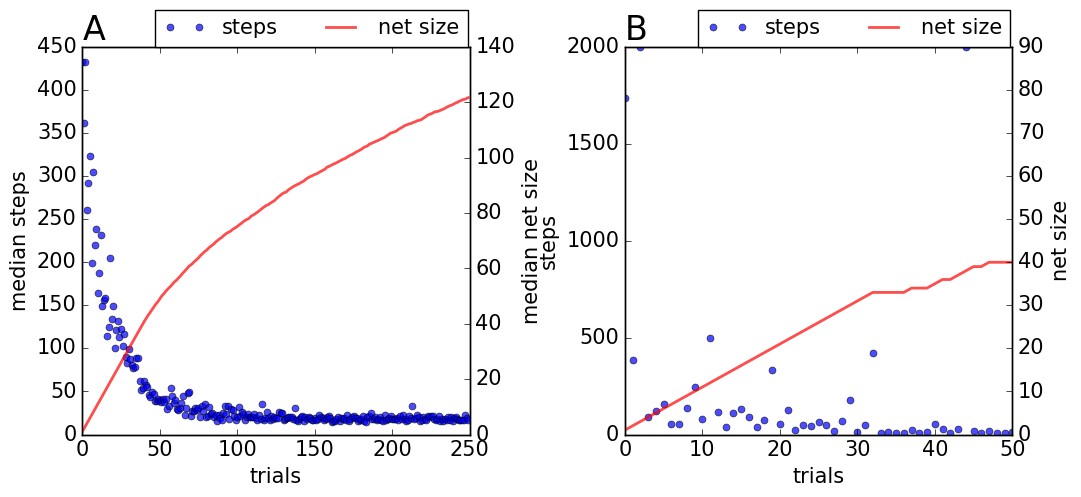

median steps last 50 trials for given run=  11.0
len of average steps:  350
average steps for trials[200:250] =  18.928


In [24]:
avrg_paths = dr.np.average(median_by_trial(paths_10x10),axis=0)
print 'avrg steps last 50 trials = ', dr.np.average(avrg_paths[-50:])

fig, (ax,ax11) = dr.plt.subplots(ncols=2, figsize=(12, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4)

#ax = fig.add_subplot(111, xlabel="trials", ylabel="average steps")
#везде добавил ограничение в 250 как в оригинальном графике
ax.grid(0)
ax.set_ylabel('median steps')
ax.set_xlabel('trials')
ax.set_title('A', loc='left', fontsize=24)
pt, = ax.plot(avrg_paths[:250], 'o', markersize=5, color='blue', alpha=0.7) #обновлено на новые данные
ax2 = ax.twinx()
fs, = ax2.plot(dr.np.average(median_by_trial(nets_10x10),  # обновлено на новые данные
                              axis=0)[:250],  '-', linewidth=2, color='red', alpha=0.7)
ax2.set_ylabel('median net size')
ax2.grid(0)
fig.legend(handles=[pt,fs], labels=['steps','net size'], ncol=2,
           loc="lower right", bbox_to_anchor=(0.3983, 0.88), 
           fontsize='medium', shadow=0)
           #loc='lower right', bbox_to_anchor=(0.22, 0.98), fontsize='medium', shadow=0)

run=11 # 11, 30(conv), 81, 90
#ax11 = fig.add_subplot(221, xlabel="trials", ylabel="steps")
ax11.grid(0)

ax11.set_ylabel('steps')
ax11.set_xlabel('trials')
ax11.set_title('B', loc='left', fontsize=24)
pt2, = ax11.plot(paths_10x10[run][:250], 'o', markersize=5, color='blue', alpha=0.7)
ax21 = ax11.twinx()
fs2, = ax21.plot(nets_10x10[run][:250],  '-', linewidth=2, color='red', alpha=0.7)
ax21.set_ylabel('net size')
ax21.grid(0)

ax11.set_xlim(0, 50)
ax21.set_xlim(0, 50)

fig.legend(handles=[pt2,fs2], labels=['steps','net size'], ncol=2,
           loc='lower right', bbox_to_anchor=(0.8507, 0.88), fontsize='medium', shadow=0)
           #loc='lower center', bbox_to_anchor=(0.72, 0.98), fontsize='medium', shadow=0)
#dr.plt.savefig("new_fig_2.pdf", bbox_inches='tight')
dr.plt.show()
print 'median steps last 50 trials for given run= ', dr.np.median(paths_10x10[run,-50:])
print 'len of average steps: ', len(avrg_paths)  
print 'average steps for trials[200:250] = ', dr.np.average((avrg_paths[:250])[-50:])

###Попробуем кое какое колдунство с графиками:


### 8. Тор(10x10): Cравнение стохастического алгоритма обучения ФС с  Reinforcement Learning на одних и тех же графах.

Графики анологичны графикам в [пункте 6](#article_6). Но здесь приводятся результаты на случайных графах большего размера (тор 10x10). 

In [26]:
fspaths_10x10 = []
rlpaths_10x10 = []


for i in xrange(1, 11):
    #old data: "10x10_RL_vs_FS/all_paths_{0}.json".format(i)))
    fspaths_10x10.extend(get_data(
            "torus/10x10_other/stochasticenvironment/all_paths_{0}.json".format(i)))
    #old data: "10x10_RL_vs_FS/RL_all_path_{0}.json".format(i)))        
    rlpaths_10x10.extend(get_data(
            "torus/10x10_td_compare/stochasticenvironment/q-learning_(0.1,0.9, 0.01)_{0}.json".format(i)))
fspaths_10x10 = dr.np.clip(dr.np.array(fspaths_10x10),0,2000)
rlpaths_10x10 = dr.np.array(rlpaths_10x10)
rlpaths_10x10_first = dr.np.average(rlpaths_10x10[:,:10], axis=1)
rlpaths_10x10_last = dr.np.average(rlpaths_10x10[:,-10:], axis=1)

#### 8.1. Эффективность RL на торе 10х10

In [27]:
rel_eff_RL_10x10 = dr.np.divide(dr.np.average(rlpaths_10x10[:,:10], axis=1),dr.np.average(rlpaths_10x10[:,-10:], axis=1))
print dr.np.average(rel_eff_RL_10x10)

2.00445913557


#### 8.2. Эффективность FS на тех же графах 10х10

In [28]:
rel_eff_FS2_10x10 = dr.np.divide(dr.np.average(fspaths_10x10[:,:10], axis=1),dr.np.average(fspaths_10x10[:,-10:], axis=1))
print dr.np.average(rel_eff_FS2_10x10)

13.3591716088


#### 8.3 Сравнение средней длинны пути для медиан.

In [29]:
rndpaths_10x10 = [] 
rndpaths_5x5 = [] 

for i in xrange(1, 11):
    #old data: "output/10x10_RL_compare/random_search_{0}.json".format(i))
    rndpaths_10x10.extend(get_data(
            "torus/10x10_other/stochasticenvironment/rnd_paths_{0}.json".format(i)))
    #old data: "output/5x5_RND/rnd_paths_{0}.json".format(i)))
    rndpaths_5x5.extend(get_data("torus/5x5/stochasticenvironment/rnd_paths_{0}.json".format(i)))
            

    
    
rndpaths_10x10 = dr.np.clip(dr.np.array(rndpaths_10x10),0,1000)
rndpaths_5x5 = dr.np.array(rndpaths_5x5)
rnd_first_10x10 = dr.np.average(rndpaths_10x10[:,:10], axis=1)
rnd_last_10x10 = dr.np.average(rndpaths_10x10[:,-10:], axis=1)
rel_eff_rnd_10x10 = dr.np.divide(rnd_first_10x10,rnd_last_10x10)
rnd_first_5x5 = dr.np.average(rndpaths_5x5[:,:10], axis=1)
rnd_last_5x5 = dr.np.average(rndpaths_5x5[:,-10:], axis=1)
rel_eff_rnd_5x5 = dr.np.divide(rnd_first_5x5,rnd_last_5x5)
print dr.np.average(rel_eff_rnd_5x5), dr.np.average(rel_eff_rnd_10x10)

#fig = dr.plt.figure(1)
#ax = fig.add_subplot(111,xlabel='trials', xlim = [0,250],
#                     ylim = [0,2000], ylabel='average of median steps by env.')
#fs, = ax.plot(dr.np.average(median_by_trial(fspaths_10x10), 
#                            axis=0),  '-b')
#rl, = ax.plot(dr.np.average(median_by_trial(rlpaths_10x10), 
#                            axis=0),  '-r')
#rnd, = ax.plot(dr.np.average(median_by_trial(rndpaths_10x10), 
#                            axis=0),  color = 'black')
#fig.legend(handles=[fs,rl,rnd], labels=['FS 10x10','RL 10x10','RND 10x10'], 
#           loc='upper center', bbox_to_anchor=(0.6, 0.85), ncol=3,
#           shadow=1)
#dr.plt.show()

1.04250113696 1.02092323284


### 9. Тор 20х20

In [30]:
paths_20x20 = []
nets_20x20 = []
rlpaths_20x20 = []


# old data: "output/20x20torus500/all_paths_{0}.json", "output/20x20torus500/all_secondary_{0}.json"
for i in xrange(1, 11):
    paths_20x20.extend(get_data("torus/20x20/stochasticenvironment/all_paths_{0}.json".format(i)))
    nets_20x20.extend(get_data("torus/20x20/stochasticenvironment/all_secondary_{0}.json".format(i)))
    #old data: "output/20x20_RL/RL8000_path_{0}.json".format(i)))
    rlpaths_20x20.extend(get_data(
                        "torus/20x20/stochasticenvironment/q-learning_(0.1,0.9, 0.01)_{0}.json".format(i)))
            

paths_20x20 = dr.np.clip(dr.np.array(paths_20x20),0,10000)
nets_20x20 = dr.np.array(nets_20x20)
rlpaths_20x20 = dr.np.clip(dr.np.array(rlpaths_20x20),0,10000)
    
#dr.black_gray_plot(paths_20x20, dr.trials_median(paths_20x20))

In [31]:
paths_first_20x20 = dr.np.average(paths_20x20[:,:10], axis=1)
paths_last_20x20 = dr.np.average(paths_20x20[:,-10:], axis=1)
nets_20x20_total = dr.np.average(nets_20x20[:,-1:], axis=1)

rlpaths_first_20x20 = dr.np.average(rlpaths_20x20[:,:10], axis=1)
rlpaths_last_20x20 = dr.np.average(rlpaths_20x20[:,-10:], axis=1)
rel_eff_RL_20x20 = dr.np.divide(rlpaths_first_20x20,rlpaths_last_20x20)
rel_eff_FS_20x20 = dr.np.divide(paths_first_20x20,paths_last_20x20)
print dr.np.average(rel_eff_FS_20x20)

17.6323361192


In [32]:
rnd_paths_20x20 = [] 

for i in xrange(1, 11):
    #old data: "output/20x20torus500/rnd_all_paths_{0}.json".format(i)))
    rnd_paths_20x20.extend(get_data(
            "torus/20x20/stochasticenvironment/rnd_paths_{0}.json".format(i)))
            

rnd_paths_20x20 = dr.np.clip(dr.np.array(rnd_paths_20x20),0,10000)
rnd_first_20x20 = dr.np.average(rnd_paths_20x20[:,:10], axis=1)
rnd_last_20x20 = dr.np.average(rnd_paths_20x20[:,-10:], axis=1)

rel_eff_rnd_20x20 = dr.np.divide(rnd_first_20x20,
                                rnd_last_20x20)
print dr.np.average(rel_eff_rnd_20x20)

1.15686811495


# Fig 3

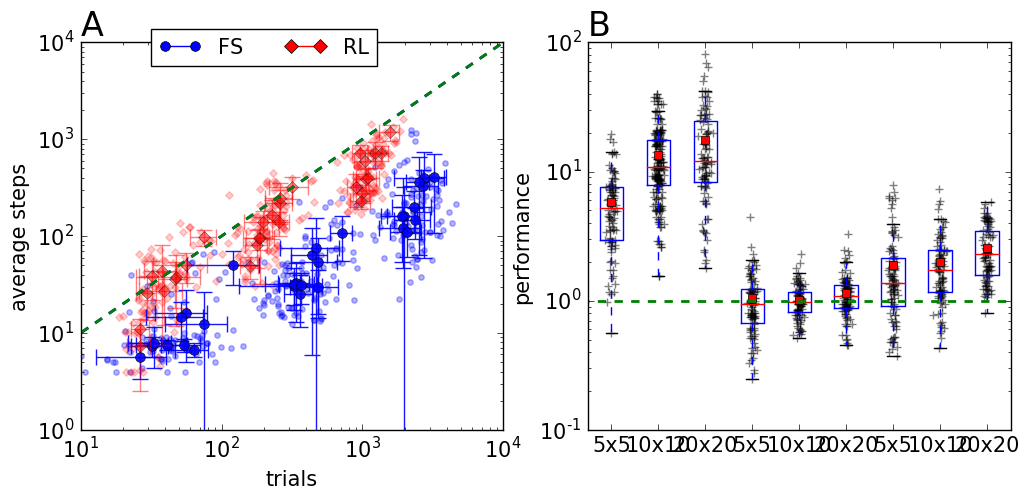

In [33]:
fig, (ax,ax2) = dr.plt.subplots(ncols=2, figsize=(12, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2)
ax.set_ylabel('average steps')
ax.set_xlabel('trials')
ax.set_title('A', loc='left', fontsize=24)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10,10000)
ax.set_ylim(1,10000)
ax.plot(dr.np.linspace(1,10000),dr.np.linspace(1,10000),'--', lw=2)

for i in range(0, 10):
    # 10x10
    ax.scatter(paths_first_10x10[i*10:(i+1)*10],
               paths_last_10x10[i*10:(i+1)*10], s=15, 
               alpha = 0.3, marker = 'o', lw= 1, color = 'b')
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
    ax.errorbar(dr.np.average(paths_first_10x10[i*10:(i+1)*10]),
               dr.np.average(paths_last_10x10[i*10:(i+1)*10]),
               xerr=dr.np.std(paths_first_10x10[i*10:(i+1)*10]),
               yerr=dr.np.std(paths_last_10x10[i*10:(i+1)*10]),
               alpha = 0.9, elinewidth = 1, color = 'b',
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
               marker='o', ms=7, capsize = 6, capthick = 1)
    # 5x5
    ax.scatter(paths_first[i*10:(i+1)*10],
               paths_last[i*10:(i+1)*10], s=15, 
               alpha = 0.3, marker = 'o', lw= 1, color = 'b')
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
    ax.errorbar(dr.np.average(paths_first[i*10:(i+1)*10]),
               dr.np.average(paths_last[i*10:(i+1)*10]),
               xerr=dr.np.std(paths_first[i*10:(i+1)*10]),
               yerr=dr.np.std(paths_last[i*10:(i+1)*10]),
               alpha = 0.9, elinewidth = 1, color = 'b',
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
               marker='o', ms=7, capsize = 6, capthick = 1)
    #20x20
    ax.scatter(paths_first_20x20[i*10:(i+1)*10],
               paths_last_20x20[i*10:(i+1)*10], s=15, 
               alpha = 0.3, marker = 'o', lw= 1, color = 'b')
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
    ax.errorbar(dr.np.average(paths_first_20x20[i*10:(i+1)*10]),
               dr.np.average(paths_last_20x20[i*10:(i+1)*10]),
               xerr=dr.np.std(paths_first_20x20[i*10:(i+1)*10]),
               yerr=dr.np.std(paths_last_20x20[i*10:(i+1)*10]),
               alpha = 0.9, elinewidth = 1, color = 'b',
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
               marker='o', ms=7, capsize = 6, capthick = 1)
    # rnd 5x5
#    ax.scatter(rnd_first_5x5[i*10:(i+1)*10],
#               rnd_last_5x5[i*10:(i+1)*10], s=10, 
#               alpha = 0.2, marker = 's', lw= 1,
#               color='black')
#    ax.errorbar(dr.np.average(rnd_first_5x5[i*10:(i+1)*10]),
#               dr.np.average(rnd_last_5x5[i*10:(i+1)*10]),
#               xerr=dr.np.std(rnd_first_5x5[i*10:(i+1)*10]),
#               yerr=dr.np.std(rnd_last_5x5[i*10:(i+1)*10]),
#               alpha = 0.6, elinewidth = 1, #color = 'b',
#               color='black',
#               marker='s', ms=5, capsize = 6, capthick = 1)    
#    # rnd 10x10
#    ax.scatter(rnd_first_10x10[i*10:(i+1)*10],
#               rnd_last_10x10[i*10:(i+1)*10], s=10, 
#               alpha = 0.2, marker = 's', lw= 1,
#               color='black')
#    ax.errorbar(dr.np.average(rnd_first_10x10[i*10:(i+1)*10]),
#               dr.np.average(rnd_last_10x10[i*10:(i+1)*10]),
#               xerr=dr.np.std(rnd_first_10x10[i*10:(i+1)*10]),
#               yerr=dr.np.std(rnd_last_10x10[i*10:(i+1)*10]),
#               alpha = 0.6, elinewidth = 1, #color = 'b',
#               color='black',
#               marker='s', ms=5, capsize = 6, capthick = 1)   
#    # rnd 20x20
#    ax.scatter(rnd_first_20x20[i*10:(i+1)*10],
#               rnd_last_20x20[i*10:(i+1)*10], s=10, 
#               alpha = 0.2, marker = 's', lw= 1,
#              color='black')
#   ax.errorbar(dr.np.average(rnd_first_20x20[i*10:(i+1)*10]),
#              dr.np.average(rnd_last_20x20[i*10:(i+1)*10]),
#               xerr=dr.np.std(rnd_first_20x20[i*10:(i+1)*10]),
#               yerr=dr.np.std(rnd_last_20x20[i*10:(i+1)*10]),
#               alpha = 0.6, elinewidth = 1, #color = 'b',
#               color='black',
#               marker='s', ms=5, capsize = 6, capthick = 1)
    # RL 5x5
    ax.scatter(rl_paths_5x5_first[i*10:(i+1)*10],
               rl_paths_5x5_last[i*10:(i+1)*10], s=15, 
               alpha = 0.2, marker = 'D', lw= 1,
               color='red')
    ax.errorbar(dr.np.average(rl_paths_5x5_first[i*10:(i+1)*10]),
               dr.np.average(rl_paths_5x5_last[i*10:(i+1)*10]),
               xerr=dr.np.std(rl_paths_5x5_first[i*10:(i+1)*10]),
               yerr=dr.np.std(rl_paths_5x5_last[i*10:(i+1)*10]),
               alpha = 0.5, elinewidth = 1, #color = 'b',
               color='red',
               marker='D', ms=6, capsize = 6, capthick = 1)    
    # RL 10x10
    ax.scatter(rlpaths_10x10_first[i*10:(i+1)*10],
               rlpaths_10x10_last[i*10:(i+1)*10], s=15, 
               alpha = 0.2, marker = 'D', lw= 1,
               color='red')
    ax.errorbar(dr.np.average(rlpaths_10x10_first[i*10:(i+1)*10]),
               dr.np.average(rlpaths_10x10_last[i*10:(i+1)*10]),
               xerr=dr.np.std(rlpaths_10x10_first[i*10:(i+1)*10]),
               yerr=dr.np.std(rlpaths_10x10_last[i*10:(i+1)*10]),
               alpha = 0.5, elinewidth = 1, #color = 'b',
               color='red',
               marker='D', ms=6, capsize = 6, capthick = 1)    
    # RL 20x20
    ax.scatter(rlpaths_first_20x20[i*10:(i+1)*10],
               rlpaths_last_20x20[i*10:(i+1)*10], s=15, 
               alpha = 0.2, marker = 'D', lw= 1,
               color='red')
    ax.errorbar(dr.np.average(rlpaths_first_20x20[i*10:(i+1)*10]),
               dr.np.average(rlpaths_last_20x20[i*10:(i+1)*10]),
               xerr=dr.np.std(rlpaths_first_20x20[i*10:(i+1)*10]),
               yerr=dr.np.std(rlpaths_last_20x20[i*10:(i+1)*10]),
               alpha = 0.5, elinewidth = 1, #color = 'b',
               color ='red', 
               marker='D', ms=6, capsize = 6, capthick = 1)  
    
ax2.set_ylabel('performance')
ax2.set_title('B', loc='left', fontsize=24)
ax2.set_yscale('log')
ax.plot(dr.np.linspace(1,10000),dr.np.linspace(1,10000),'--', lw=2)
ax2.scatter(dr.np.random.normal(1, 0.05, size=len(rel_eff_FS_5x5)),rel_eff_FS_5x5, alpha=0.5, s=40, marker='+', color='black')
ax2.scatter(dr.np.random.normal(2, 0.05, size=len(dr.np.concatenate((rel_eff_FS_10x10,rel_eff_FS2_10x10)))),
           dr.np.concatenate((rel_eff_FS_10x10,rel_eff_FS2_10x10)), alpha=0.5, s=40, marker='+', color='black')
ax2.scatter(dr.np.random.normal(3, 0.05, size=len(rel_eff_FS_20x20)),rel_eff_FS_20x20, alpha=0.5, s=40, marker='+', color='black')
ax2.scatter(dr.np.random.normal(7, 0.05, size=len(rel_eff_RL_5x5)),rel_eff_RL_5x5, alpha=0.5, s=40, marker='+', color='black')
ax2.scatter(dr.np.random.normal(8, 0.05, size=len(rel_eff_RL_10x10)),rel_eff_RL_10x10, alpha=0.5, s=40, marker='+', color='black')
ax2.scatter(dr.np.random.normal(9, 0.05, size=len(rel_eff_RL_20x20)),rel_eff_RL_20x20, alpha=0.5, s=40, marker='+', color='black')
ax2.scatter(dr.np.random.normal(4, 0.05, size=len(rel_eff_rnd_5x5)),rel_eff_rnd_5x5, alpha=0.5, s=40, marker='+', color='black')
ax2.scatter(dr.np.random.normal(5, 0.05, size=len(rel_eff_rnd_10x10)),rel_eff_rnd_10x10, alpha=0.5, s=40, marker='+', color='black')
ax2.scatter(dr.np.random.normal(6, 0.05, size=len(rel_eff_rnd_20x20)),rel_eff_rnd_20x20, alpha=0.5, s=40, marker='+', color='black')
ax2.boxplot([rel_eff_FS_5x5,dr.np.concatenate((rel_eff_FS_10x10,rel_eff_FS2_10x10)),
            rel_eff_FS_20x20,rel_eff_rnd_5x5,rel_eff_rnd_10x10,rel_eff_rnd_20x20,rel_eff_RL_5x5,rel_eff_RL_10x10,rel_eff_RL_20x20], 
           labels=['5x5','10x10','20x20','5x5','10x10','20x20','5x5','10x10','20x20'],
           showmeans=1, showfliers=0, notch=0, sym='+', vert=1, whis=1.5)
ax2.plot([1,1,1,1,1,1,1,1,1,1,1], 'g--', lw=2)
#ax2.plot([1,2,3],[dr.np.median(rel_eff_FS_5x5),
#                 dr.np.median(dr.np.concatenate((rel_eff_FS_10x10,rel_eff_FS2_10x10))),
#                 dr.np.median(rel_eff_FS_20x20)],'g')
#ax2.plot([4,5,6],[dr.np.median(rel_eff_RL_5x5),dr.np.median(rel_eff_RL_10x10),dr.np.median(rel_eff_RL_20x20)],'g')

fs, = ax.plot([0], ms=7,  marker = 'o', lw= 1, color='blue')
rl, = ax.plot([0], ms=7,  marker = 'D', lw= 1, color='red')
rnd, = ax.plot([0], ms=7,  marker = 's', lw= 1, color='black')

#fig.legend(handles=[fs,rnd,rl], 
#           labels=['FS','RND','RL'], 
#           loc='upper center', bbox_to_anchor=(0.23, 0.94), 
#           ncol=3, fontsize='medium')
fig.legend(handles=[fs,rl], 
           labels=['FS','RL'], 
           loc='upper center', bbox_to_anchor=(0.22, 0.96), 
           ncol=2, fontsize='medium')
dr.plt.show()

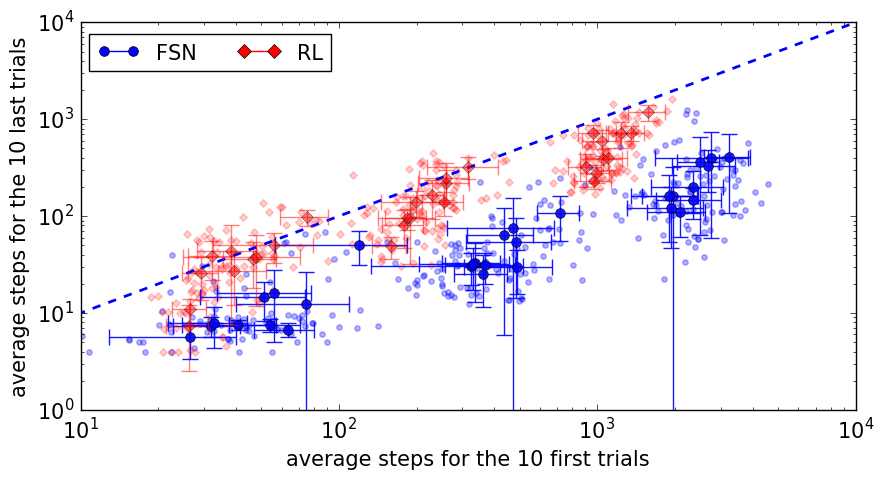

In [34]:
fig, ax = dr.plt.subplots(ncols=1, figsize=(10, 5))#(10, 5)) #original
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2)
ax.set_ylabel('average steps for the 10 last trials')
ax.set_xlabel('average steps for the 10 first trials')
#ax.set_title('A', loc='left', fontsize=24)
ax.set_yscale('log') #original
ax.set_xscale('log') #original
ax.set_xlim(10,10000)  # ax.set_xlim(10,10000) #original
ax.set_ylim(1,10000) # ax.set_ylim(1,10000)  #original
ax.plot(dr.np.linspace(1,10000),dr.np.linspace(1,10000),'--', lw=2)

for i in range(0, 10):
    # 10x10
    ax.scatter(paths_first_10x10[i*10:(i+1)*10],
               paths_last_10x10[i*10:(i+1)*10], s=15, 
               alpha = 0.3, marker = 'o', lw= 1, color = 'b')
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
    ax.errorbar(dr.np.average(paths_first_10x10[i*10:(i+1)*10]),
               dr.np.average(paths_last_10x10[i*10:(i+1)*10]),
               xerr=dr.np.std(paths_first_10x10[i*10:(i+1)*10]),
               yerr=dr.np.std(paths_last_10x10[i*10:(i+1)*10]),
               alpha = 0.9, elinewidth = 1, color = 'b',
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
               marker='o', ms=7, capsize = 6, capthick = 1)
    # 5x5
    ax.scatter(paths_first[i*10:(i+1)*10],
               paths_last[i*10:(i+1)*10], s=15, 
               alpha = 0.3, marker = 'o', lw= 1, color = 'b')
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
    ax.errorbar(dr.np.average(paths_first[i*10:(i+1)*10]),
               dr.np.average(paths_last[i*10:(i+1)*10]),
               xerr=dr.np.std(paths_first[i*10:(i+1)*10]),
               yerr=dr.np.std(paths_last[i*10:(i+1)*10]),
               alpha = 0.9, elinewidth = 1, color = 'b',
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
               marker='o', ms=7, capsize = 6, capthick = 1)
    #20x20
    ax.scatter(paths_first_20x20[i*10:(i+1)*10],
               paths_last_20x20[i*10:(i+1)*10], s=15, 
               alpha = 0.3, marker = 'o', lw= 1, color = 'b')
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
    ax.errorbar(dr.np.average(paths_first_20x20[i*10:(i+1)*10]),
               dr.np.average(paths_last_20x20[i*10:(i+1)*10]),
               xerr=dr.np.std(paths_first_20x20[i*10:(i+1)*10]),
               yerr=dr.np.std(paths_last_20x20[i*10:(i+1)*10]),
               alpha = 0.9, elinewidth = 1, color = 'b',
               #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
               marker='o', ms=7, capsize = 6, capthick = 1)

    # RL 5x5
    ax.scatter(rl_paths_5x5_first[i*10:(i+1)*10],
               rl_paths_5x5_last[i*10:(i+1)*10], s=15, 
               alpha = 0.2, marker = 'D', lw= 1,
               color='red')
    ax.errorbar(dr.np.average(rl_paths_5x5_first[i*10:(i+1)*10]),
               dr.np.average(rl_paths_5x5_last[i*10:(i+1)*10]),
               xerr=dr.np.std(rl_paths_5x5_first[i*10:(i+1)*10]),
               yerr=dr.np.std(rl_paths_5x5_last[i*10:(i+1)*10]),
               alpha = 0.5, elinewidth = 1, #color = 'b',
               color='red',
               marker='D', ms=6, capsize = 6, capthick = 1)    
    # RL 10x10
    ax.scatter(rlpaths_10x10_first[i*10:(i+1)*10],
               rlpaths_10x10_last[i*10:(i+1)*10], s=15, 
               alpha = 0.2, marker = 'D', lw= 1,
               color='red')
    ax.errorbar(dr.np.average(rlpaths_10x10_first[i*10:(i+1)*10]),
               dr.np.average(rlpaths_10x10_last[i*10:(i+1)*10]),
               xerr=dr.np.std(rlpaths_10x10_first[i*10:(i+1)*10]),
               yerr=dr.np.std(rlpaths_10x10_last[i*10:(i+1)*10]),
               alpha = 0.5, elinewidth = 1, #color = 'b',
               color='red',
               marker='D', ms=6, capsize = 6, capthick = 1)    
    # RL 20x20
    ax.scatter(rlpaths_first_20x20[i*10:(i+1)*10],
               rlpaths_last_20x20[i*10:(i+1)*10], s=15, 
               alpha = 0.2, marker = 'D', lw= 1,
               color='red')
    ax.errorbar(dr.np.average(rlpaths_first_20x20[i*10:(i+1)*10]),
               dr.np.average(rlpaths_last_20x20[i*10:(i+1)*10]),
               xerr=dr.np.std(rlpaths_first_20x20[i*10:(i+1)*10]),
               yerr=dr.np.std(rlpaths_last_20x20[i*10:(i+1)*10]),
               alpha = 0.5, elinewidth = 1, #color = 'b',
               color ='red', 
               marker='D', ms=6, capsize = 6, capthick = 1)  
  

#ax2.plot([1,2,3],[dr.np.median(rel_eff_FS_5x5),
#                 dr.np.median(dr.np.concatenate((rel_eff_FS_10x10,rel_eff_FS2_10x10))),
#                 dr.np.median(rel_eff_FS_20x20)],'g')
#ax2.plot([4,5,6],[dr.np.median(rel_eff_RL_5x5),dr.np.median(rel_eff_RL_10x10),dr.np.median(rel_eff_RL_20x20)],'g')

fs, = ax.plot([0], ms=7,  marker = 'o', lw= 1, color='blue')
rl, = ax.plot([0], ms=7,  marker = 'D', lw= 1, color='red')
rnd, = ax.plot([0], ms=7,  marker = 's', lw= 1, color='black')

#fig.legend(handles=[fs,rnd,rl], 
#           labels=['FS','RND','RL'], 
#           loc='upper center', bbox_to_anchor=(0.23, 0.94), 
#           ncol=3, fontsize='medium')
fig.legend(handles=[fs,rl], 
           labels=['FSN','RL'], 
           loc='upper center', bbox_to_anchor=(0.21, 0.91), 
           ncol=2, fontsize='medium')
#dr.plt.savefig("new_fig_4.pdf", bbox_inches='tight')
dr.plt.show()

### 10. Масштабируемость

# Fig 2

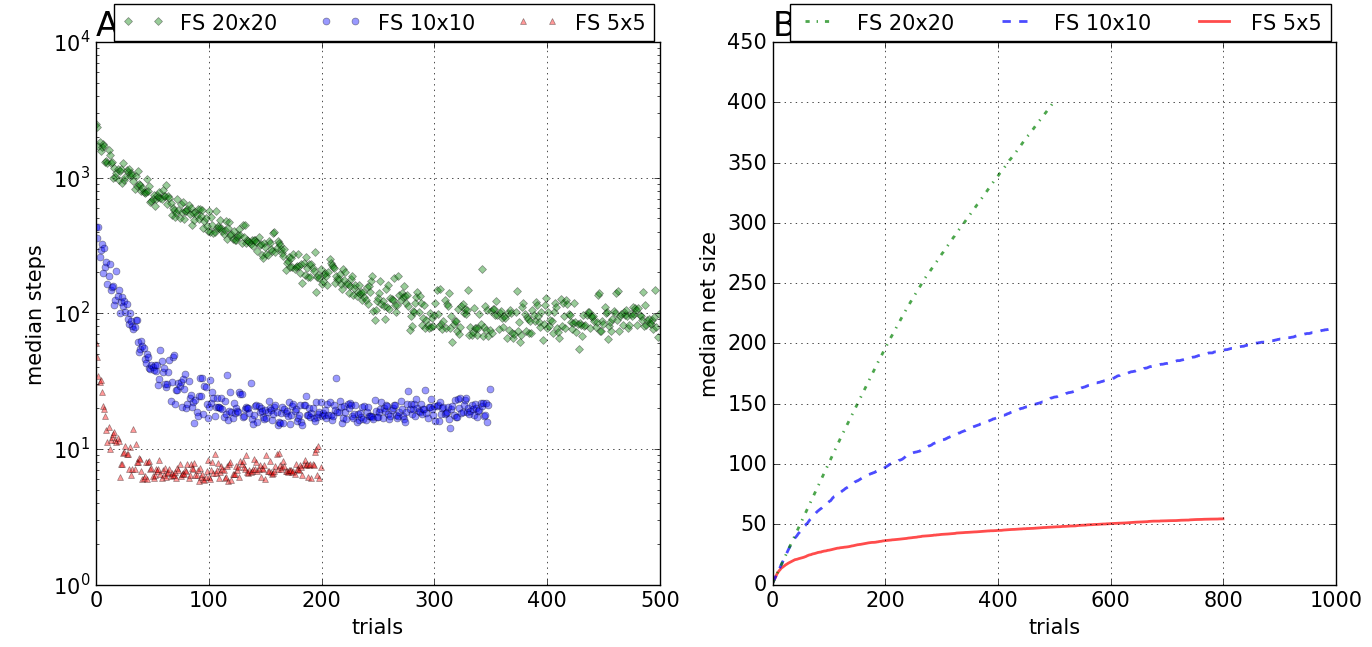

In [35]:
fig, (ax,ax11) = dr.plt.subplots(ncols=2, figsize=(16, 7))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2)
ax.set_ylabel('median steps')
ax.set_xlabel('trials')
ax.set_title('A', loc='left', fontsize=24)
ax.set_yscale('log')
ax.set_xlim([0,500])
ax.grid(1)
fs20, = ax.plot(dr.np.average(median_by_trial(paths_20x20), 
                              axis=0),  'D', markersize=4, color='green', alpha=0.4)
fs10, = ax.plot(dr.np.average(median_by_trial(paths_10x10), 
                              axis=0),  'o', markersize=5, color='blue', alpha=0.4)
fs5, = ax.plot(dr.np.average(median_by_trial(paths_5x5),#paths5x5_2k), 
                             axis=0),  '^', markersize=5, color='red', alpha=0.4)
fig.legend(handles=[fs20,fs10,fs5], labels=['FS 20x20','FS 10x10','FS 5x5'],
           loc='upper right', bbox_to_anchor=(0.4153, .933), #loc='upper left', bbox_to_anchor=(0.28, 0.98),
           ncol=3, fontsize='medium')


#ax = fig.add_subplot(111,xlabel='trials', xlim=[0,1000], ylim=[0,500],
#                     ylabel='average of median #FS by env.', 
#                     yscale='linear')
#ax.plot(
ax11.set_ylabel('median net size')
ax11.set_xlabel('trials')
ax11.set_title('B', loc='left', fontsize=24)
ax11.grid(1)
fs5, = ax11.plot(dr.np.average(sat_nets, 
                             axis=0), '-', color='red', lw=2, alpha=0.7)

fs10, = ax11.plot(dr.np.average(nets_10x10_1000, 
                              axis=0), '--',  color='blue', lw=2, alpha=0.7)
fs20, = ax11.plot(dr.np.average(median_by_trial(nets_20x20), 
                              axis=0), '-.', color='green', lw=2, alpha=0.7)
fig.legend(handles=[fs20,fs10,fs5], labels=['FS 20x20','FS 10x10','FS 5x5'], 
           loc='upper right', bbox_to_anchor=(.8381, .933), # loc='upper right', #bbox_to_anchor=(0.78, 0.98),
           ncol=3, fontsize='medium')

#dr.plt.savefig("new_fig_3.pdf", bbox_inches='tight')
dr.plt.show()

In [36]:
m5fs = dr.np.median(paths_5x5[:,-10:])
m10fs = dr.np.median(paths_10x10[:,-10:])
m20fs = dr.np.median(paths_20x20[:,-10:])
m5rnd = dr.np.median(rndpaths_5x5[:,-10:])
m10rnd = dr.np.median(rndpaths_10x10[:,-10:])
m20rnd = dr.np.median(rnd_paths_20x20[:,-10:])
a5fs = dr.np.average(paths_5x5[:,-10:])
a10fs = dr.np.average(paths_10x10[:,-10:])
a20fs = dr.np.average(paths_20x20[:,-10:])
a5rnd = dr.np.average(rndpaths_5x5[:,-10:])
a10rnd = dr.np.average(rndpaths_10x10[:,-10:])
a20rnd = dr.np.average(rnd_paths_20x20[:,-10:])

format_row = lambda name,x,y,z : "{0:<15}|{1:<15}|{2:<15}|{3:<15}|".format(name,x,y,z)


print 'median for the 10 last trials'
print format_row("",'5x5', '10x10', '20x20')
print format_row('FS',m5fs,m10fs,m20fs)
print format_row('RND',m5rnd,m10rnd,m20rnd)

print '\n','average for the 10 last trials'
print format_row("",'5x5', '10x10', '20x20')
print format_row('FS',a5fs,a10fs,a20fs)
print format_row('RND',a5rnd,a10rnd,a20rnd)
print format_row('ratio m',m5rnd/m5fs,m10rnd/m10fs,m20rnd/m20fs)
print format_row('ratio avr',a5rnd/a5fs,a10rnd/a10fs,a20rnd/a20fs)

#5x5 & 7 & 61 & 13.658 & 108.7 & 8.786 & 7.959 \\
#Таблицу я обновил!


median for the 10 last trials
               |5x5            |10x10          |20x20          |
FS             |7.0            |17.0           |70.0           |
RND            |61.5           |449.5          |2025.0         |

average for the 10 last trials
               |5x5            |10x10          |20x20          |
FS             |13.658         |48.426         |239.849        |
RND            |108.7          |506.194        |2885.692       |
ratio m        |8.78571428571  |26.4411764706  |28.9285714286  |
ratio avr      |7.95870552057  |10.4529385041  |12.031286351   |


### 10. Сравнение эффективности

In [37]:
summ_last_avrg = [dr.np.average(paths_last), dr.np.average(paths_last_10x10), dr.np.average(paths_last_20x20),
       dr.np.average(rl_paths_5x5_last), dr.np.average(rlpaths_10x10_last), dr.np.average(rlpaths_last_20x20), 
       dr.np.average(rnd_last_5x5), dr.np.average(rnd_last_10x10), dr.np.average(rnd_last_20x20)]
summ_last_avrg_diff = [summ_last_avrg[1]/summ_last_avrg[0],summ_last_avrg[2]/summ_last_avrg[1],                       
                       summ_last_avrg[4]/summ_last_avrg[3],summ_last_avrg[5]/summ_last_avrg[4],
                       summ_last_avrg[7]/summ_last_avrg[6],summ_last_avrg[8]/summ_last_avrg[7],]

print 'FS5x5','FS10x10','FS20x20','RL5x5','RL10x10','RL20x20','RND5x5','RND10x10','RND20x20'
print dr.np.round(summ_last_avrg)

FS5x5 FS10x10 FS20x20 RL5x5 RL10x10 RL20x20 RND5x5 RND10x10 RND20x20
[   14.    48.   240.    37.   156.   556.   109.   506.  2886.]


In [38]:
print 'Run      |     Median       |    Average'
print 'FS 5x5   | ', dr.np.median(rnd_last_5x5)/dr.np.median(paths_last), ' | ', dr.np.average(rnd_last_5x5)/dr.np.average(paths_last)
print 'FS 10x10 | ', dr.np.median(rnd_last_10x10)/dr.np.median(paths_last_10x10), ' | ', dr.np.average(rnd_last_10x10)/dr.np.average(paths_last_10x10)
print 'FS 20x20   | ', dr.np.median(rnd_last_20x20)/dr.np.median(paths_last_20x20), ' | ', dr.np.average(rnd_last_20x20)/dr.np.average(paths_last_20x20)
print 'RL 5x5   | ', dr.np.median(rnd_last_5x5)/dr.np.median(rl_paths_5x5_last), ' | ', dr.np.average(rnd_last_5x5)/dr.np.average(rl_paths_5x5_last)
print 'RL 10x10 | ', dr.np.median(rnd_last_10x10)/dr.np.median(rlpaths_10x10_last), ' | ', dr.np.average(rnd_last_10x10)/dr.np.average(rlpaths_10x10_last)
print 'RL 20x20 | ', dr.np.median(rnd_last_20x20)/dr.np.median(rlpaths_last_20x20), ' | ', dr.np.average(rnd_last_20x20)/dr.np.average(rlpaths_last_20x20)

Run      |     Median       |    Average
FS 5x5   |  12.5714285714  |  7.95870552057
FS 10x10 |  16.3060897436  |  10.4529385041
FS 20x20   |  15.9901420702  |  12.031286351
RL 5x5   |  3.35528596187  |  2.9011423081
RL 10x10 |  4.01222397476  |  3.24764379431
RL 20x20 |  5.42868392558  |  5.18742517338


In [39]:
print 'Run      |     Median       |    Average'
print 'FS 5x5   | ', dr.np.median(rel_eff_FS_5x5), ' | ', dr.np.average(rel_eff_FS_5x5)
print 'FS 10x10 | ', dr.np.median(dr.np.concatenate((rel_eff_FS_10x10,rel_eff_FS2_10x10))), ' | ', dr.np.average(dr.np.concatenate((rel_eff_FS_10x10,rel_eff_FS2_10x10)))
print 'FS 20x20   | ', dr.np.median(rel_eff_FS_20x20), ' | ', dr.np.average(rel_eff_FS_20x20)
print 'RL 5x5   | ', dr.np.median(rel_eff_RL_5x5), ' | ', dr.np.average(rel_eff_RL_5x5)
print 'RL 10x10 | ', dr.np.median(rel_eff_RL_10x10), ' | ', dr.np.average(rel_eff_RL_10x10)
print 'RL 20x20 | ', dr.np.median(rel_eff_RL_20x20), ' | ', dr.np.average(rel_eff_RL_20x20)
print 'RND 5x5 | ', dr.np.median(rel_eff_rnd_5x5), ' | ', dr.np.average(rel_eff_rnd_5x5)
print 'RND 10x10 | ', dr.np.median(rel_eff_rnd_10x10), ' | ', dr.np.average(rel_eff_rnd_10x10)
print 'RND 20x20 | ', dr.np.median(rel_eff_rnd_20x20), ' | ', dr.np.average(rel_eff_rnd_20x20)

Run      |     Median       |    Average
FS 5x5   |  5.24307692308  |  5.82676568845
FS 10x10 |  10.7955777136  |  13.3591716088
FS 20x20   |  12.0265371848  |  17.6323361192
RL 5x5   |  1.36764733977  |  1.89163449369
RL 10x10 |  1.71512448595  |  2.00445913557
RL 20x20 |  2.29187186757  |  2.55001578119
RND 5x5 |  0.950904498044  |  1.04250113696
RND 10x10 |  0.969175524263  |  1.02092323284
RND 20x20 |  1.08187469599  |  1.15686811495


### 11. Сравнение эффективности алгоритма SARSA и Q-LEARNING с различными параметрами (тор 10x10)

Ниже начинается часть использующая старые данные, тк она не влияла на графики из статьи.
Дата: 22.09.15

In [40]:
average_median = lambda paths: dr.np.average(median_by_trial(paths), axis=0) # для краткости

# графики среднего значения слишком скакали, поэтому для понятности пришлось немного сгладить.
def last_n_averages(values, n): 
    l =[]
    for i in xrange(0, len(values)):
        part = values[max(0, i + 1 - n): i + 1]
        l.append(sum(part) / float(len(part)))
    return l

aa = lambda paths, n: last_n_averages(average_median(paths), n) # для еще большей краткости

params = [.1, .2, .5, .8, .9] # значения для alpha и gamma, что использовались в алгоримах
sarsa = {(alpha, gamma):[] for alpha in params for gamma in params} 
qlearning = {(alpha, gamma):[] for alpha in params for gamma in params}
random_search = [] 

# загружаем результаты испытаний
fld = join_path(results_dir, "10x10_RL_compare/")
for i in xrange(1, 11):
    random_search.extend(dr.get_json_data(fld+"random_search_{0}.json".format(i)))
    for alpha, gamma in sarsa:
        sarsa[(alpha, gamma)].extend(dr.get_json_data(fld+"sarsa_({0},{1})_{2}.json".format(alpha, gamma, i)))   
        qlearning[(alpha, gamma)].extend(dr.get_json_data(fld+"q-learning_({0},{1})_{2}.json".format(alpha, gamma, i)))

In [41]:
last_n = 10 # усреднение по последним n значениям внутри одного графика(для сглаживания)
less_params = (.2, .5, .8) # графиков оказалось слишком много(51) чтобы что-то понять. пришлось уменьшить.

### 12. RL для Тора(20x20)

In [42]:


# В начале посчитал RL с верхним ограничением в 4000 тысячи шагов. 
# Но потом решил добавить еще два варианта 2000(как для 10x10) и 8000
# Здесь привожу их сравнение. 
rl8000 = []
rl4000 = []
rl2000 = []

for i in xrange(1, 11):
    rl8000.extend(get_data("20x20_RL/RL8000_path_{0}.json".format(i)))
    rl4000.extend(get_data("20x20_RL/RL4000_path_{0}.json".format(i)))
    rl2000.extend(get_data("20x20_RL/RL2000_path_{0}.json".format(i)))

### 13. Сранение RL и FS в среде с другим типом стохастичности(Тор10x10)

В новой среде доступность ребер разыгрывается каждый раз, когда меняется состояние среды.

In [43]:
alt_rl = []
alt_fs = []
alt_rnd = []

for i in xrange(1, 12):
    alt_fs.extend(get_data("10x10_new_stochastisity/all_paths_{0}.json".format(i)))
    alt_rnd.extend(get_data("10x10_new_stochastisity/rnd_paths_{0}.json".format(i)))
    alt_rl.extend(get_data("10x10_new_stochastisity/RL4000_path_{0}.json".format(i)))
    
alt_rl_mdp = []
alt_fs_mdp = []
alt_rnd_mdp = []

for i in xrange(1, 11):
    alt_fs_mdp.extend(get_data("10x10torus_markov2/all_paths_{0}.json".format(i)))
    alt_rnd_mdp.extend(get_data("10x10torus_markov2/rnd_paths_{0}.json".format(i)))
    alt_rl_mdp.extend(get_data("10x10torus_markov2/RL4000_path_{0}.json".format(i)))

In [44]:
print dr.np.average(dr.np.median(rndpaths_10x10, axis=0))
print dr.np.average(dr.np.median(alt_rnd, axis=0))
print dr.np.average(dr.np.median(alt_rnd_mdp, axis=0))
print dr.np.average(dr.np.median(alt_rl_mdp, axis=0))

415.851428571
287.426
229.15
162.222


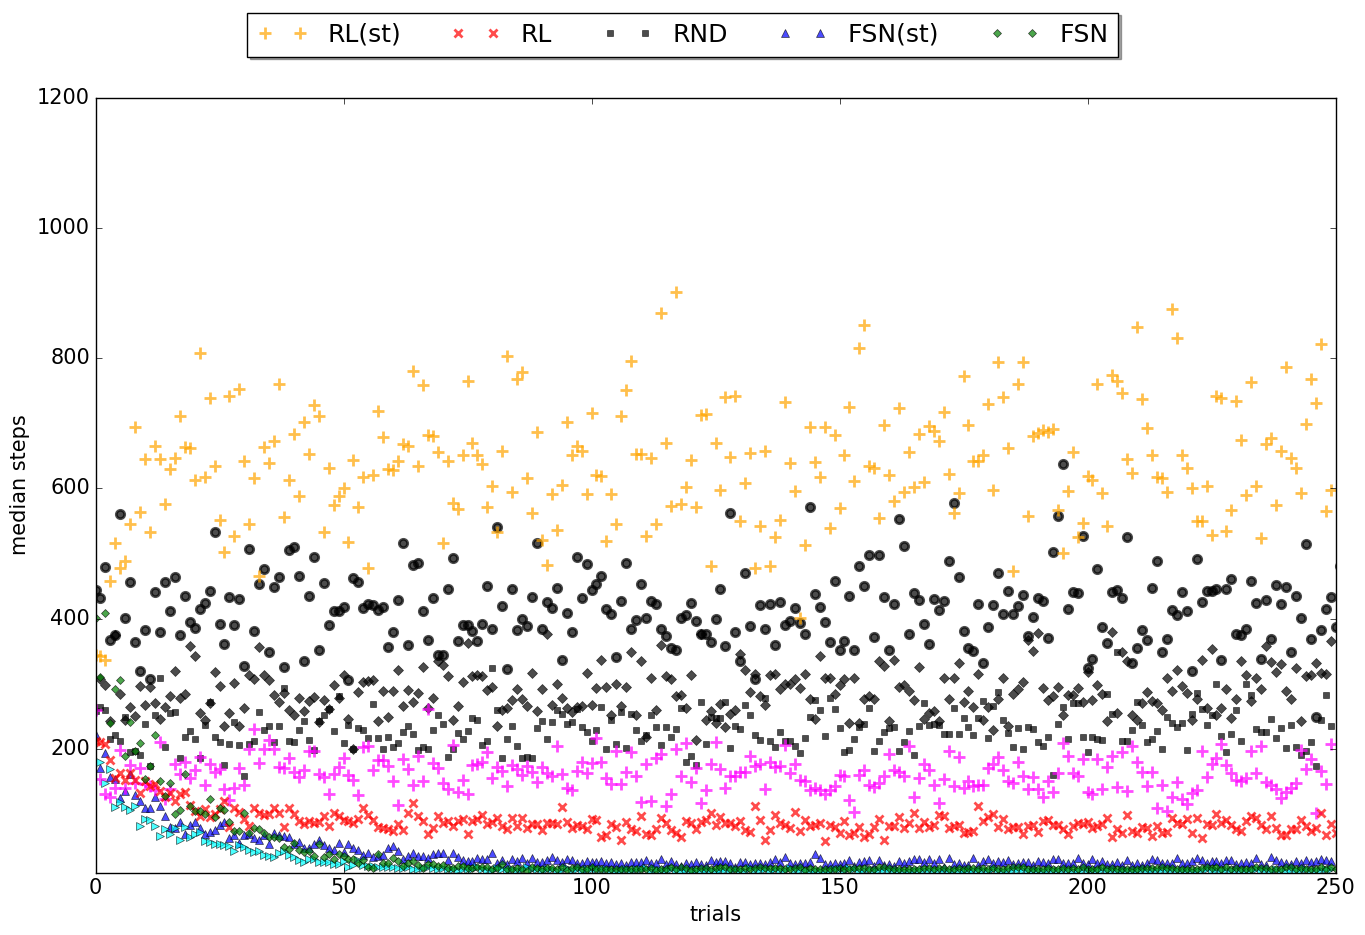

In [45]:
#%matplotlib qt
fig = dr.plt.figure(1, figsize=(16, 10)) 
ax = fig.add_subplot(111, yscale='Linear', xlim=(0,250), ylim=(10,1200), xlabel='trials', 
                     ylabel='median steps')        

h_fs, = ax.plot(dr.np.median(alt_fs, axis=0), '^', color = "blue", markersize=6, alpha=0.7)
h_fs_mdp, = ax.plot(dr.np.median(alt_fs_mdp, axis=0), '>', color = "cyan", markersize=6, alpha=0.7)
h_rnd, = ax.plot(dr.np.median(alt_rnd, axis=0),  'D',color = "black", markersize=5, alpha=0.7)
h_rnd_mdp, = ax.plot(dr.np.median(alt_rnd_mdp,  axis=0),  's',color = "black", markersize=5, alpha=0.7)
rnd10, = ax.plot(dr.np.median(rndpaths_10x10, axis=0),   'o', color = "black", mew = 2, markersize=6, alpha=0.7)
h_rl, = ax.plot(dr.np.median(alt_rl, axis=0), '+', color = "orange", mew = 2, markersize=8, alpha=0.7)
h_rl_mdp, = ax.plot(dr.np.median(alt_rl_mdp,  axis=0), '+', color = "magenta", mew = 2, markersize=8, alpha=0.7)
rl10, = ax.plot(dr.np.median(rlpaths_10x10,
                              axis=0), 'x', color = "red", mew = 2, markersize=6, alpha=0.7)
fs10, = ax.plot(dr.np.median(fspaths_10x10, 
                              axis=0), 'Dg', markersize=4, alpha=0.7)
fig.legend(handles=(h_rl, rl10, h_rnd_mdp, h_fs, fs10), labels=("RL(st)", "RL", "RND", "FSN(st)", "FSN"),
           loc='upper center', shadow=1, ncol=6)  
'''ax.plot([0,250],[451,451], color='red')
ax.plot([0,250],[402,402], color='red')
ax.plot([0,250],[318,318], color='red')
ax.plot([0,250],[292,292], color='magenta')'''
dr.plt.show()

In [46]:
folder_with_TORUS_results = join_path(resluts_dir, "torus")
folder_with_ER_results = join_path(resluts_dir, "erdos_renyi")
folder_with_WS_results = join_path(resluts_dir, "watts_strogatz")
folder_with_BA_results = join_path(resluts_dir, "barabasi_albert")

base_plot_params = {
    "xlabel":"trials", 
    "ylabel":"average path length",
}

small_envs = [
    folder_with_ER_results + "/n25_p0.25",
    folder_with_WS_results + "/N25_K6_b0.1",
    folder_with_BA_results + "/N25_M3",
    folder_with_TORUS_results + "/5x5"
    ]

medium_envs = [
    folder_with_ER_results + "/n100_p0.06",
    folder_with_WS_results + "/N100_K6_b0.1",
    folder_with_BA_results + "/N100_M3",
    folder_with_TORUS_results + "/10x10_other"
    ]

big_envs = [
    folder_with_ER_results + "/n400_p0.015",
    folder_with_WS_results + "/N400_K6_b0.1",
    folder_with_BA_results + "/N400_M3",
    folder_with_TORUS_results + "/20x20"
    ]
stoch_types = {
    1:"stochasticenvironment",
    2:"changestatestochasticityenv",
    3:"markovenvironment"
    }

line_styles = {
    1:"-",
    2:"--",
    3:":"
    }

def load_results(result_files_template, file_indices):
    results = []
    for i in file_indices:
        results.extend(dr.get_json_data(result_files_template.format(i)))
        
    results = dr.np.array(results) #dr.np.clip(dr.np.array(results),0,2000)    
    return results  

def vizualize_all_stochastisity_RL_vs_FS(folder_with_results, **kwargs): #ylim=None):
   
    # загружаем результаты испытаний
    fs = {}
    rl = {}
    for k, v in stoch_types.iteritems():
        fs[k] = load_results(folder_with_results + "/" + v + "/all_paths_{0}.json", xrange(1, 11))
        rl[k] = load_results(folder_with_results + "/" + v + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
            
    last_n = 10 # усреднение по последним n значениям внутри одного графика(для сглаживания)

    fig = dr.plt.figure(1) 
    ax = fig.add_subplot(111, **kwargs) 
    #if ylim:
    #    ax.set_ylim(*ylim)
    h2l = [] # handels to labels for the legend of the plot
    
    for k, v in fs.iteritems():
        handle, = ax.plot(aa(v, last_n), line_styles[k], color = "red", lw=2)
        h2l.append((handle, "FS({0})".format(k)))
        
    for k, v in rl.iteritems():
        handle, = ax.plot(aa(v, last_n), line_styles[k], color = "blue", lw=2)
        h2l.append((handle, "RL({0})".format(k)))     

    h, l = zip(*h2l)
    fig.legend(handles=h, labels=l, loc='lower left',# shadow=1, #ncol=6)
               bbox_to_anchor=(.060, .070), # loc='upper right', #bbox_to_anchor=(0.78, 0.98),
               ncol=2, fontsize='medium')
    dr.plt.savefig("FS_vs_RL_learning_curve.png", bbox_inches='tight')
    #dr.plt.title("Environment: {0}".format(env_type))
    dr.plt.show()    

../results/torus/10x10_other


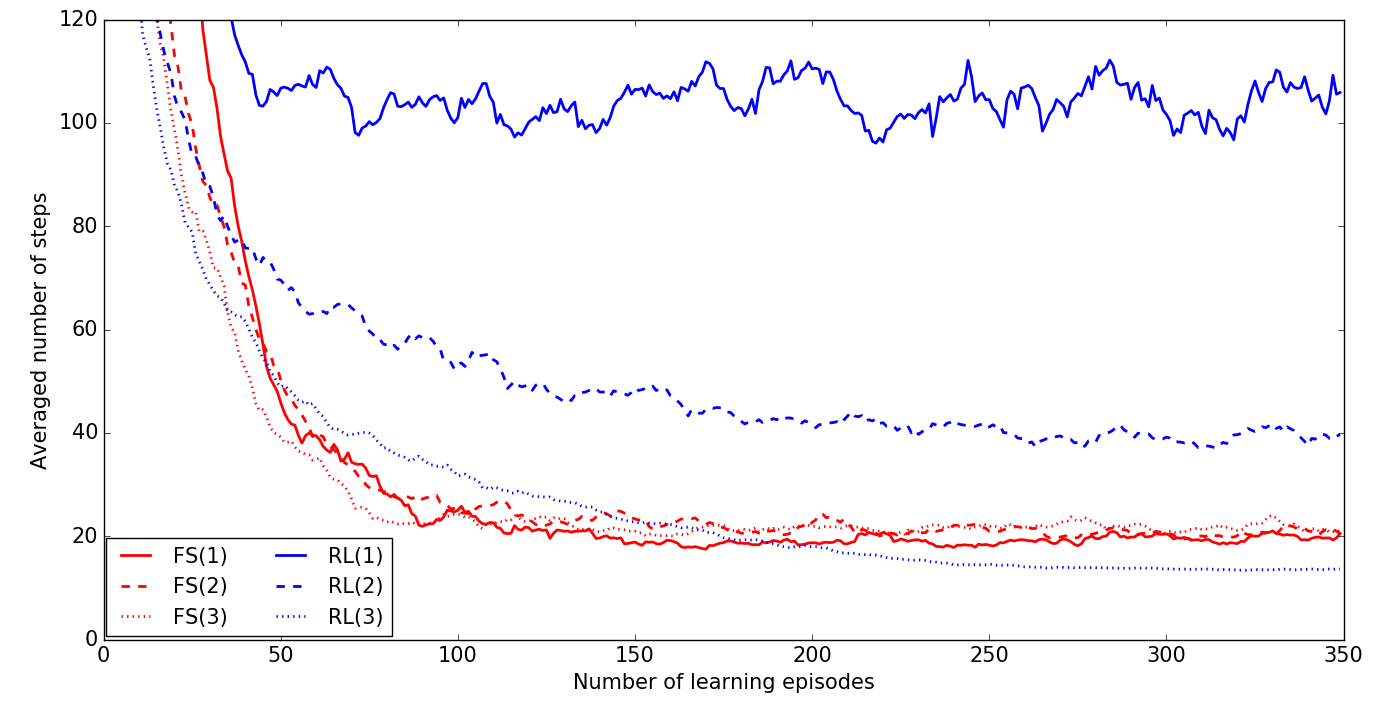

In [47]:
env_folder = medium_envs[3]
pylab.rcParams['figure.figsize'] = 16, 8
pylab.rcParams.update({'font.size':15})
print env_folder
vizualize_all_stochastisity_RL_vs_FS(env_folder, xlim=(0,350), ylim=(0,120), 
                                     xlabel="Number of learning episodes",
                                     ylabel="Averaged number of steps")

### Графики для отчета  2016: 

In [48]:
def safe_load_results(result_files_template, file_indices, show_warning=False):
  results = []
  for i in file_indices:
    try:
      res = dr.get_json_data(result_files_template.format(i))
    except IOError as e:
      if show_warning:
        print 'IOError on file {0}: {1}'.format(result_files_template.format(i), e.strerror)
    else:
      results.extend(res)
  
  results = dr.np.array(results) 
  return results  

#### Посмотрим что там с DQN

30
Среднее число шагов: 9644.75666667
Медиана: 12116.5
mean number of elementary steps in all runs: 459198.033333


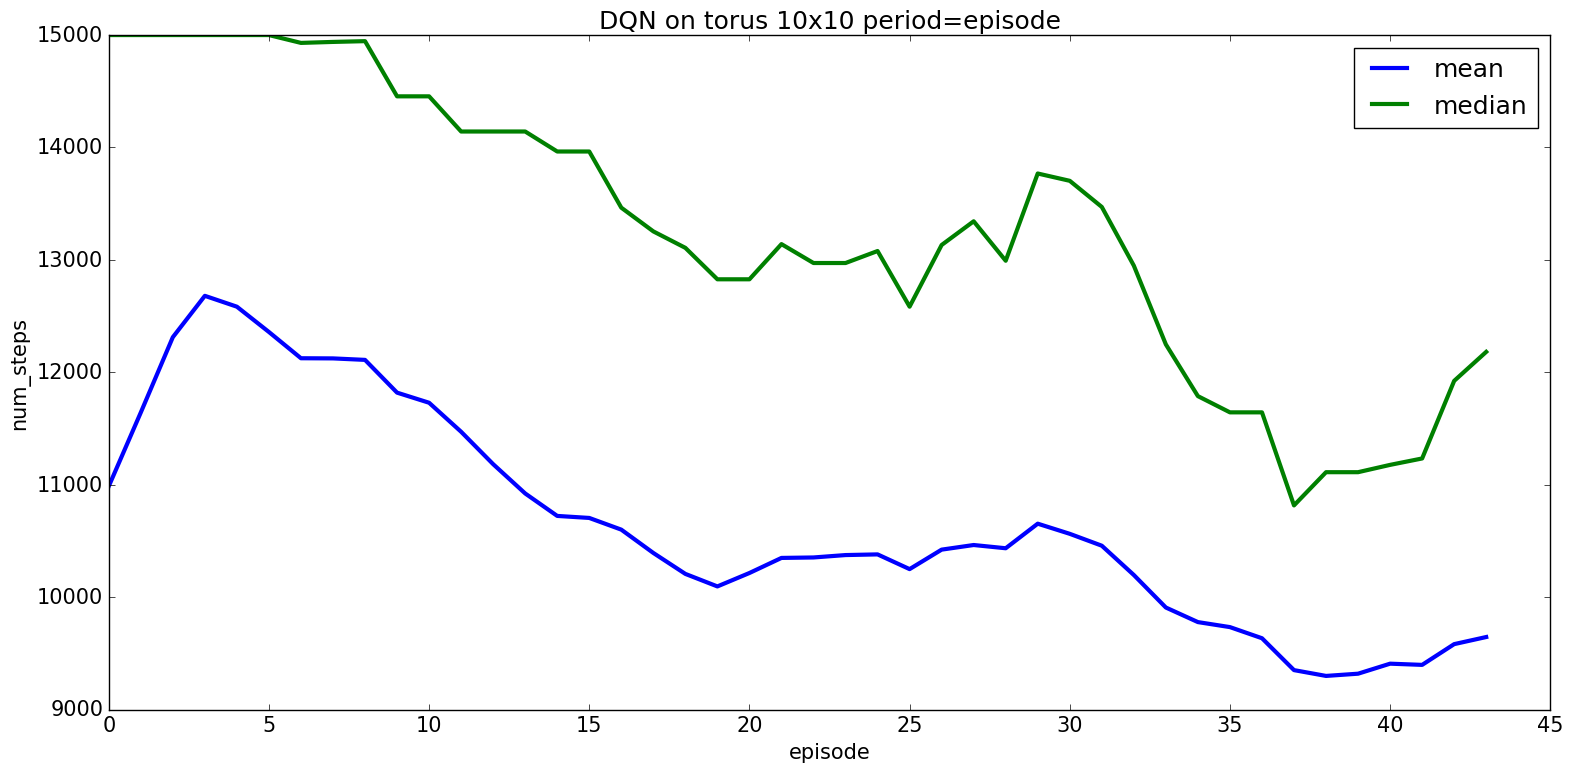

In [49]:
from matplotlib import pyplot as plt
import numpy as np

def clip_runs(runs):
    min_episodes_number = min(len(run) for run in runs)
    clipped_runs = np.empty((len(runs), min_episodes_number))
    for run, episode in np.ndindex(clipped_runs.shape):
        clipped_runs[run,episode] = runs[run][episode]
    
    return clipped_runs
  
  
def plot_mean_and_median(runs, title, **kwargs):
    window_size = 10
    median_steps = last_n_averages(np.median(runs, axis=0), window_size)
    mean_steps = last_n_averages(np.mean(runs, axis=0), window_size)

    fig = plt.figure(1) 
    ax = fig.add_subplot(111, **kwargs)
    ax.set_title(title)
    ax.set_xlabel('episode')
    ax.set_ylabel('num_steps')
    ax.plot(mean_steps, color = 'blue', lw=3, label='mean')
    ax.plot(median_steps, color = 'green', lw=3, label='median')
    plt.legend(loc='upper right')
    fig.tight_layout()
    plt.show()   

grid_4x4x1_ep = join_path(resluts_dir, 'sparse_grid/4x4x1/stochasticenvironment/')
grid_4x4x4_ep = join_path(resluts_dir, 'sparse_grid/4x4x4/stochasticenvironment/')

grid_4x4x1_p1 = join_path(resluts_dir, 'sparse_grid/4x4x1/periodicenvironment_1/')
grid_4x4x4_p1 = join_path(resluts_dir, 'sparse_grid/4x4x4/periodicenvironment_1/')

dqn_template = 'dqn_burtsev_{0}.json'

#stoch_types = ('stochasticenvironment', 'periodicenvironment_1')
all_runs = load_results(grid_4x4x4_ep + dqn_template, xrange(1,4))

print len(all_runs)

nb_steps = [sum(r) for r in all_runs]
all_runs = clip_runs(all_runs)

last_episodes = np.array(all_runs)[:,-10:]
print 'Среднее число шагов:', np.mean(last_episodes)
print 'Медиана:', np.median(last_episodes)
print 'mean number of elementary steps in all runs:', np.mean(np.sum(np.array(all_runs),axis=1))


plot_mean_and_median(all_runs, 'DQN on torus 10x10 period=episode')#, ylim=(0,4000)) 


График обучение по максимальному числу эпизодов из всех запусков: 

In [50]:
def stats_from_diff_length_runs(runs, stats_fn):
    maxlen = max(len(run) for run in runs)
    stats = [None]*maxlen
    
    for i in xrange(maxlen):
        stats[i] = stats_fn([r[i] for r in runs if len(r) > i]) 
        
    return stats
  
def visualize_longest_dqn(grid_folder, envs_indices=None, **kwargs):
  if envs_indices is None:
    envs_indices = xrange(1,11)
    
  all_runs = load_results(grid_folder + dqn_template, envs_indices)
    
  fig = plt.figure(1) 
  ax = fig.add_subplot(111, **kwargs)
  ax.set_xlabel('episode')
  ax.set_ylabel('num_steps')

  window_size = 10

  for i, run in enumerate(all_runs):
    averaged_run = last_n_averages(run, window_size)
    if i == 0:
      ax.plot(averaged_run, color='gray', alpha=0.5, label='individual run')
    else:
      ax.plot(averaged_run, color='gray', alpha=0.5)
    
  median_steps = last_n_averages(stats_from_diff_length_runs(all_runs, np.median), window_size)
  mean_steps = last_n_averages(stats_from_diff_length_runs(all_runs, np.mean), window_size)

  ax.plot(mean_steps, color = 'blue', lw=3, label='mean')
  ax.plot(median_steps, color = 'green', lw=3, label='median')

  #print 'median:', np.mean(stats_from_diff_length_runs(all_runs, np.median)[490:500])
  #print 'mean:', np.mean(stats_from_diff_length_runs(all_runs, np.mean)[490:500])

  plt.legend(loc='upper right')
  fig.tight_layout()
  plt.show() 

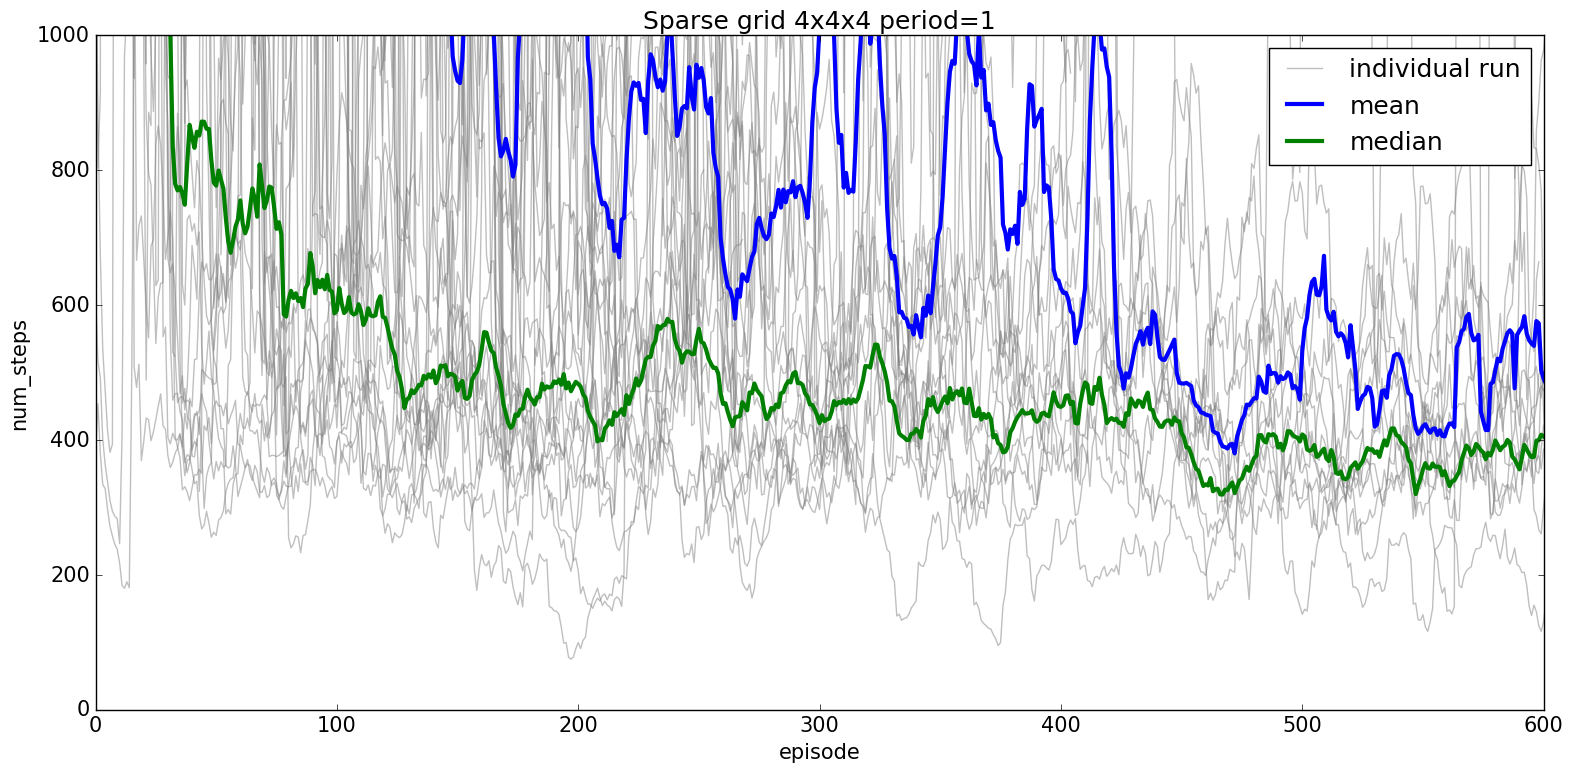

In [51]:
visualize_longest_dqn(grid_4x4x4_p1, envs_indices=xrange(1,4),
                      title='Sparse grid 4x4x4 period=1', ylim=(0,1000), xlim=(0,600))

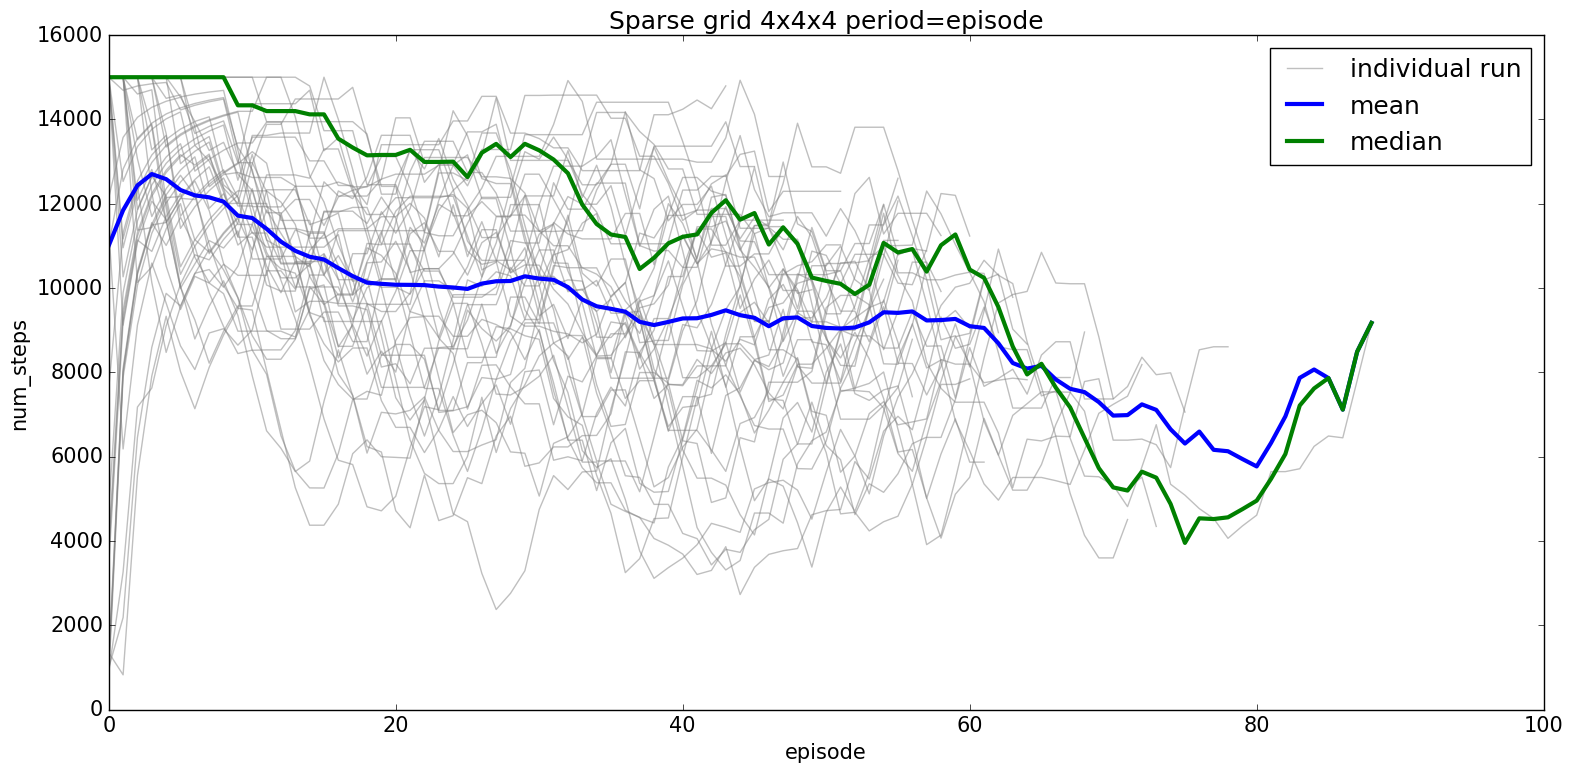

In [52]:
visualize_longest_dqn(grid_4x4x4_ep, envs_indices=xrange(1,5),
                      title='Sparse grid 4x4x4 period=episode', xlim=(0,100))

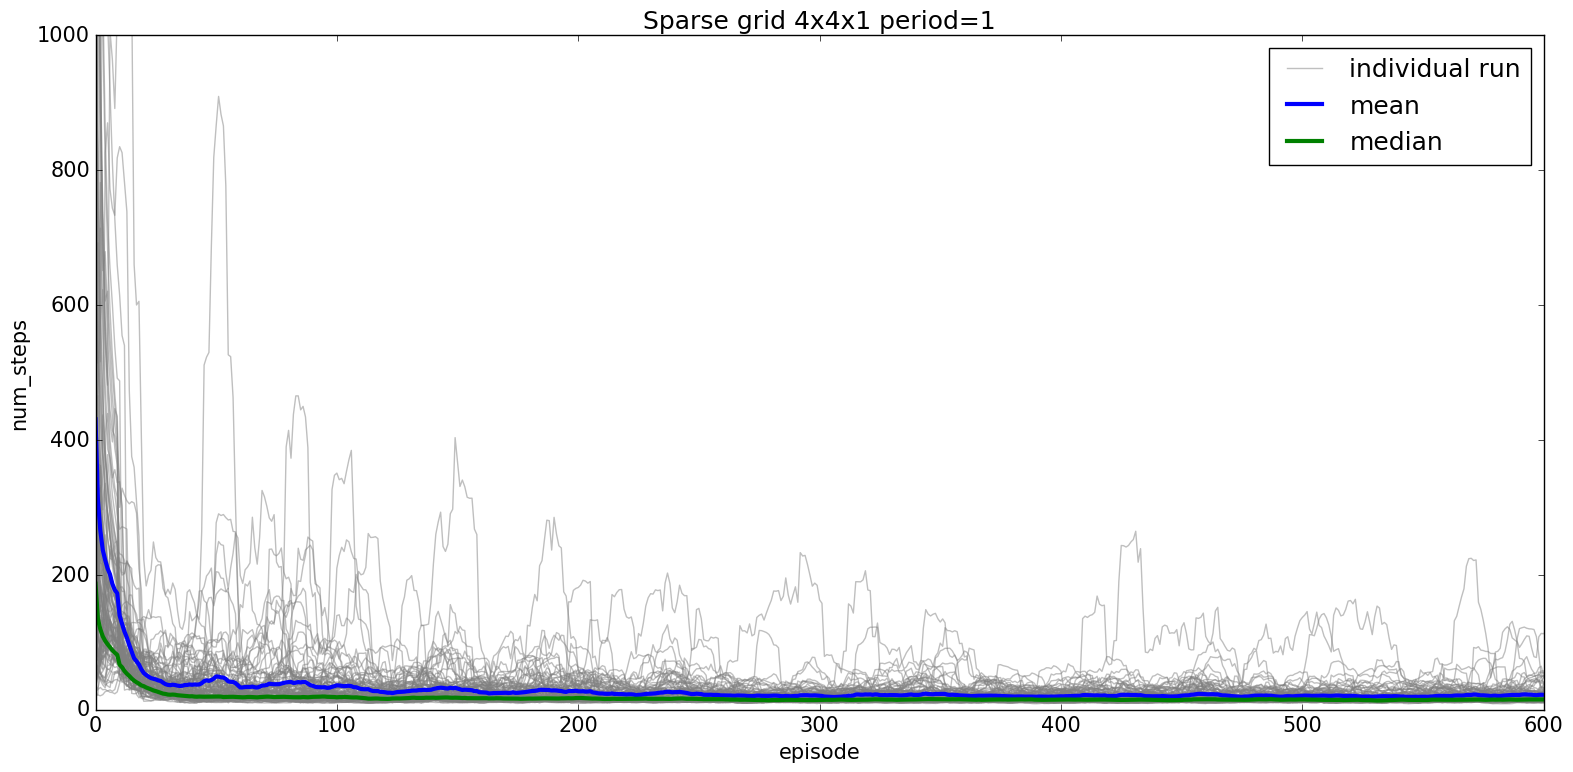

In [53]:
visualize_longest_dqn(grid_4x4x1_p1, envs_indices=xrange(1,11),
                      title='Sparse grid 4x4x1 period=1', ylim=(0,1000), xlim=(0,600))

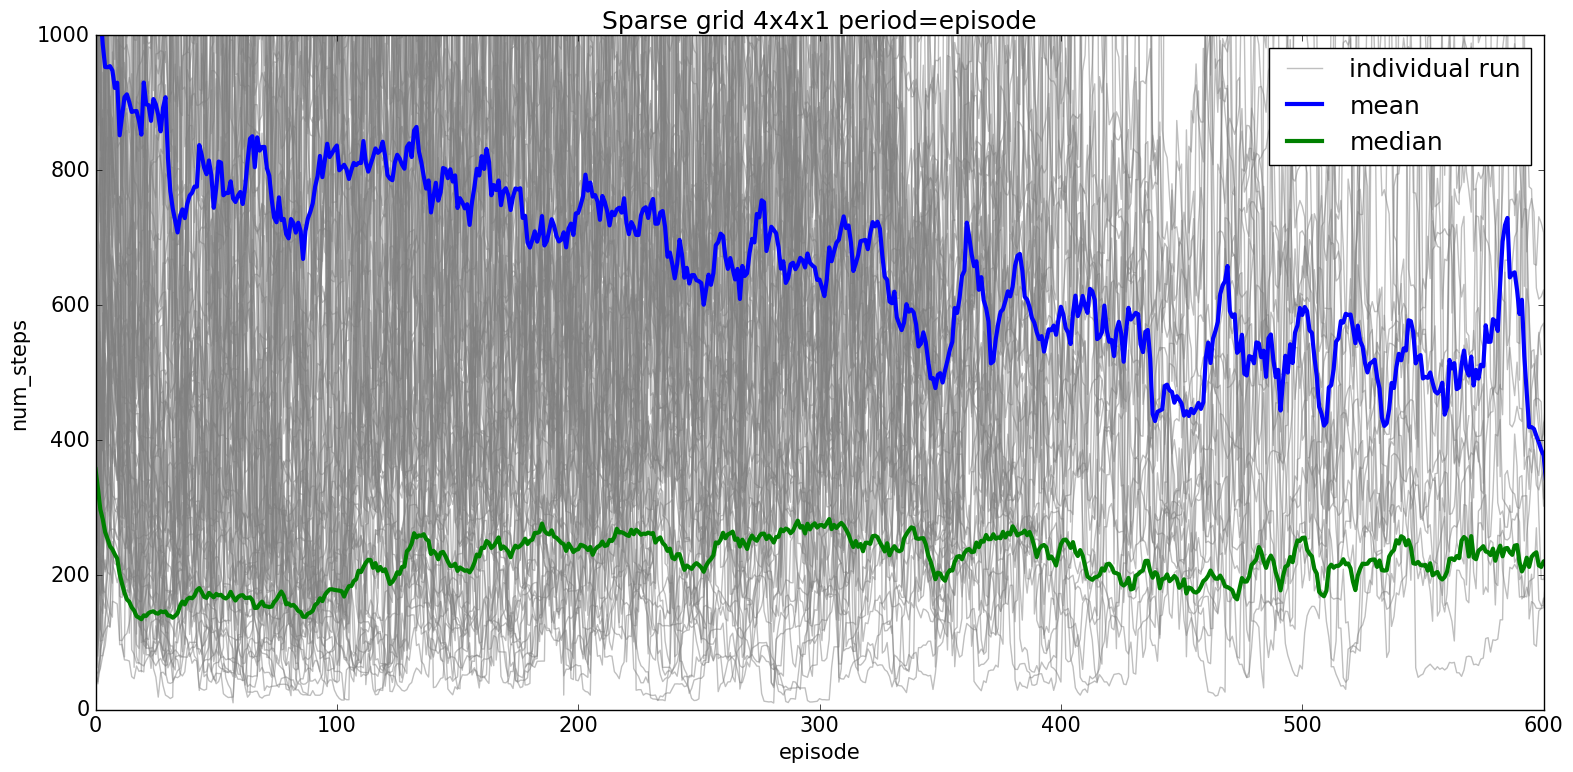

In [54]:
visualize_longest_dqn(grid_4x4x1_ep, envs_indices=xrange(1,10),
                      title='Sparse grid 4x4x1 period=episode', ylim=(0,1000), xlim=(0,600))

#### Попробуем запилить таблицу средних значений и медиан: 

In [55]:
algname2filename = {
  'dqn': dqn_template,
  'fsn': 'fsn_path(0.05,0.99,0.9)_{0}.json', 
  'h_fsn': 'h_fsn_path(0.05,0.99,0.9)_{0}.json',
  'h_qfsn': 'h_qfsn_path(0.05,0.9,0.9)_{0}.json',
  'pq' : 'pq_inf(0.1,0.9,0.01)_{0}.json',
}

def print_min_number_of_steps_for_algs(env_folder, title):
  print
  print title
  print '---'*30
  for name, filename in algname2filename.iteritems():
    res = safe_load_results(env_folder + filename, xrange(1,11))
    print name, ": ", min(sum(r) for r in res)

print '###'*30
print 'Минимальное число шагов среди всех запусков для каждого алгоритма на каждой среде:'
print_min_number_of_steps_for_algs(grid_4x4x1_p1, 'Sparse Grid 4x4x1 period=1')

print_min_number_of_steps_for_algs(grid_4x4x1_ep, 'Sparse Grid 4x4x1 period=epsode')
 
print_min_number_of_steps_for_algs(grid_4x4x4_p1, 'Sparse Grid 4x4x4 period=1')
 
print_min_number_of_steps_for_algs(grid_4x4x4_ep, 'Sparse Grid 4x4x4 period=episode')
 



##########################################################################################
Минимальное число шагов среди всех запусков для каждого алгоритма на каждой среде:

Sparse Grid 4x4x1 period=1
------------------------------------------------------------------------------------------
dqn :  99884
pq :  12926
h_fsn :  12118
fsn :  11355
h_qfsn :  11787

Sparse Grid 4x4x1 period=epsode
------------------------------------------------------------------------------------------
dqn :  290600
pq :  13380
h_fsn :  12236
fsn :  12251
h_qfsn :  11685

Sparse Grid 4x4x4 period=1
------------------------------------------------------------------------------------------
dqn :  587494
pq :  184439
h_fsn :  82516
fsn :  107938
h_qfsn :  89755

Sparse Grid 4x4x4 period=episode
------------------------------------------------------------------------------------------
dqn :  585123
pq :  393037
h_fsn :  149294
fsn :  168197
h_qfsn :  120343


In [56]:
def last_10_stats(runs, stats_fn):
  res = []
  for run in runs:
    res.extend(run[-10:])
  return stats_fn(res)

def last_10_median(runs):
  return last_10_stats(runs, stats_fn=np.median)

def last_10_average(runs):
  return last_10_stats(runs, stats_fn=np.mean)
  
def print_table():
  format_row = lambda name, a,b,c,d : "{0:<15}|{1:<15}|{2:<15}|{3:<15}|{4:<15}|".format(name, a,b,c,d)
  envs = [grid_4x4x1_p1, grid_4x4x4_p1, grid_4x4x1_ep, grid_4x4x4_ep]
  algs = ['fsn', 'h_fsn', 'h_qfsn', 'dqn', 'pq']
  
  print format_row("",'4x4x1 mdp', '4x4x4 mdp', '4x4x1 episode', '4x4x4 episode')
  for stat_name, stat_func in [('median', last_10_median), ('average', last_10_average)]:
    print '{0} for the 10 last trials'.format(stat_name)
    
    for algname in algs:
      values = [] 
      for env in envs:
        runs = safe_load_results(env + algname2filename[algname], xrange(1,11))
        values.append(stat_func(runs)) 
      print format_row(algname,*values)
    print 

  return
  
print_table()

#foo = np.array(safe_load_results(grid_4x4x4_p1 + algname2filename['fsn'], xrange(1,11)))
#np.median(foo[:,-10:]), last_10_median(foo)

#load_results(grid_4x4x4_ep + algname2filename['dqn'], xrange(1,11))

               |4x4x1 mdp      |4x4x4 mdp      |4x4x1 episode  |4x4x4 episode  |
median for the 10 last trials
fsn            |15.0           |193.5          |10.5           |341.0          |
h_fsn          |15.0           |101.5          |10.0           |55.0           |
h_qfsn         |13.0           |67.0           |9.0            |39.0           |
dqn            |12.0           |512.5          |336.5          |12800.5        |
pq             |14.0           |94.5           |9.0            |39.0           |

average for the 10 last trials
fsn            |35.865         |354.188        |21.733         |685.984        |
h_fsn          |37.249         |275.643        |17.685         |231.832        |
h_qfsn         |30.92          |237.296        |15.383         |93.491         |
dqn            |18.703         |1802.20333333  |716.885        |9846.94428571  |
pq             |35.016         |286.301        |15.598         |347.593        |



#### Визуализируем графики формата число шагов до цели к числу эпизодов обучения:

In [57]:
from random import shuffle
def sublist_shuffle(l, left, right):
  tmp = l[left:right]
  shuffle(tmp)
  l[left:right] = tmp
  
def vizualize_sparse_grid(grid_folder, compute_stats=None, block_algs=(), **kwargs):
  if compute_stats is None:
    compute_stats = lambda data: average_median(data)

  # загружаем результаты испытаний    
  fsn = load_results(grid_folder + 'fsn_path(0.05,0.99,0.9)_{0}.json', xrange(1,11))
  h_fsn = load_results(grid_folder + 'h_fsn_path(0.05,0.99,0.9)_{0}.json', xrange(1,11))
  h_qfsn = load_results(grid_folder + 'h_qfsn_path(0.05,0.9,0.9)_{0}.json', xrange(1,11))
  pq = load_results(grid_folder + 'pq_inf(0.1,0.9,0.01)_{0}.json', xrange(1,11))
  dqn = safe_load_results(grid_folder + algname2filename['dqn'], xrange(1,11))

  if kwargs.pop('shuffle', False):
    sublist_shuffle(h_fsn, 20, 200)
    sublist_shuffle(h_qfsn, 20, 200)
    sublist_shuffle(fsn, 20, 200)


  last_n = 10 # усреднение по последним n значениям внутри одного графика(для сглаживания)

  #last_n_averages(average_median(paths), n)

  fig = dr.plt.figure(1) 
  ax = fig.add_subplot(111, **kwargs) 
  #if ylim:
  #    ax.set_ylim(*ylim)
  h2l = [] # handels to labels for the legend of the plot

  if 'h_fsn' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(h_fsn),last_n), '-', color = "red", lw=2)
    h2l.append((handle, "h-FSN"))

  if 'h_qfsn' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(h_qfsn), last_n), '-', color = "orange", lw=2)
    h2l.append((handle, "h-FSN(Q-update)"))

  if 'fsn' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(fsn),last_n), '-', color = "blue", lw=2)
    h2l.append((handle, "FSN"))

  if 'pq' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(pq), last_n), '-', color = "purple", lw=2)
    h2l.append((handle, "Periodic Qlearnign"))

  if 'dqn' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(dqn), last_n), '-', color = "green", lw=2)
    h2l.append((handle, "DQN"))


  h, l = zip(*h2l)
  fig.legend(handles=h, labels=l, loc='lower left',# shadow=1, #ncol=6)
             bbox_to_anchor=(.558, .740), # loc='upper right', #bbox_to_anchor=(0.78, 0.98),
             ncol=2, fontsize='medium')


  #dr.plt.savefig("FS_vs_RL_learning_curve.png", bbox_inches='tight')
  #dr.plt.title("Environment: {0}".format(env_type))
  #dr.plt.show()    
    
mean = lambda x: np.mean(x, axis=0)
median = lambda x: np.median(x, axis=0)

diff_len_mean = lambda x: stats_from_diff_length_runs(x, np.mean)
diff_len_median = lambda x: stats_from_diff_length_runs(x, np.median)

clip_mean = lambda x: np.mean(clip_runs(x), axis=0)
clip_median = lambda x: np.median(clip_runs(x), axis=0)


../results/sparse_grid/4x4x1/periodicenvironment_1/


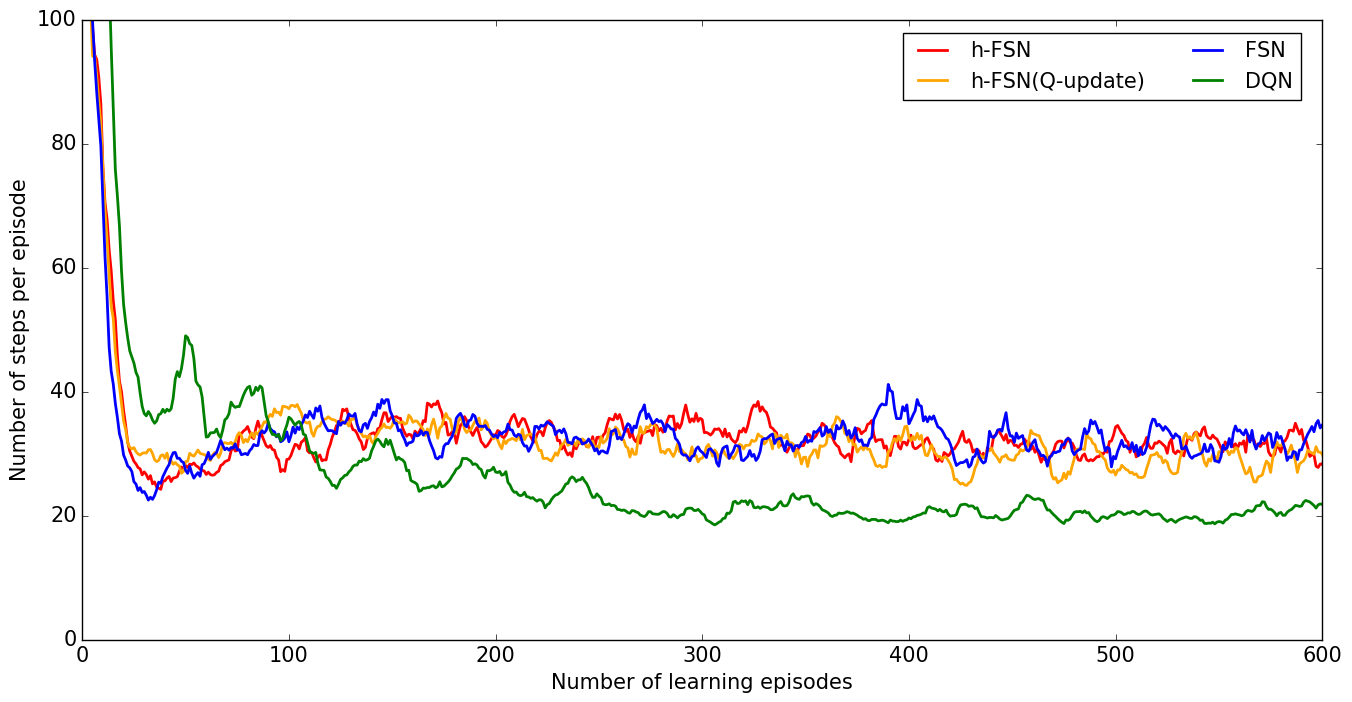

In [58]:
grid_folder = join_path(resluts_dir, 'sparse_grid/4x4x1/periodicenvironment_1/')
pylab.rcParams['figure.figsize'] = 16, 8
pylab.rcParams.update({'font.size':15})
print grid_folder

vizualize_sparse_grid(grid_folder, compute_stats=diff_len_mean, block_algs=['pq'],
                      ylim=(0,100),  xlim=(0,600), shuffle=True, 
                      xlabel="Number of learning episodes",
                      ylabel="Number of steps per episode")

dr.plt.savefig("grid_4x4x1_p_1_mean.png", bbox_inches='tight')
dr.plt.show()

../results/sparse_grid/4x4x1/stochasticenvironment/


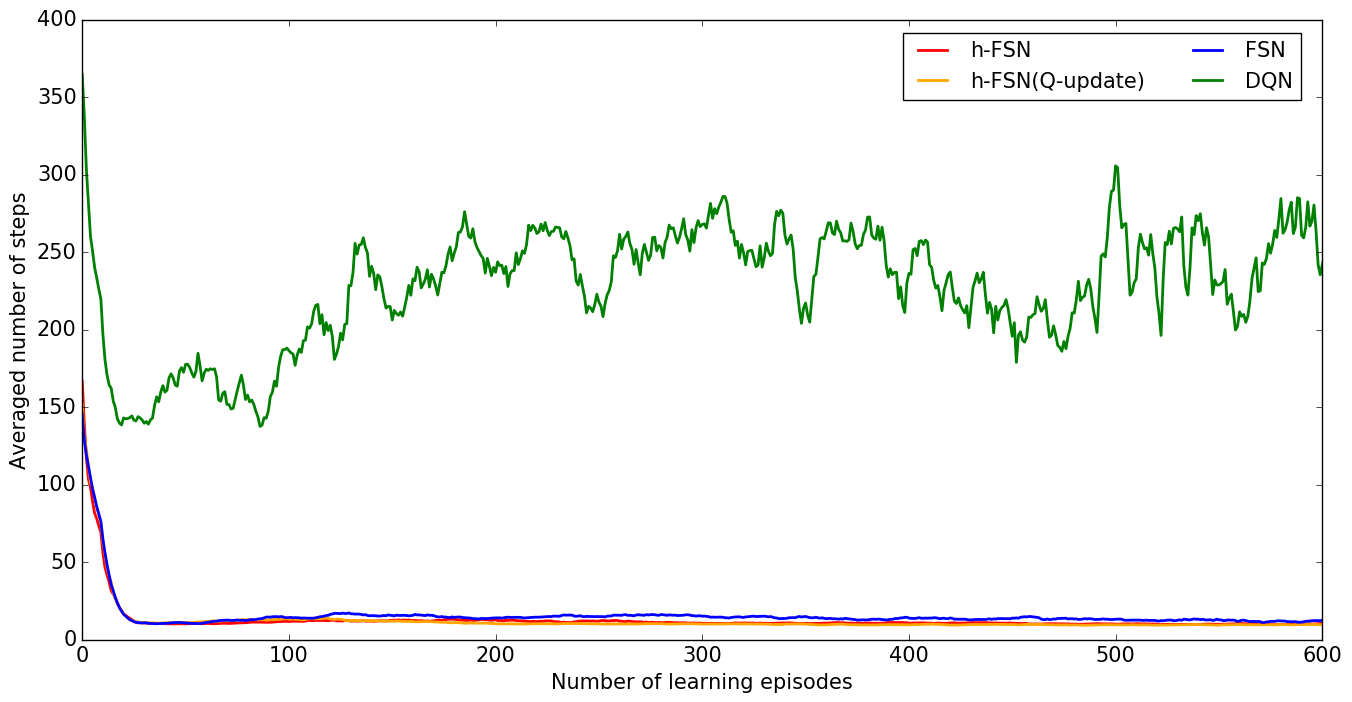

In [59]:
grid_folder = join_path(resluts_dir, 'sparse_grid/4x4x1/stochasticenvironment/')
pylab.rcParams['figure.figsize'] = 16, 8
pylab.rcParams.update({'font.size':15})
print grid_folder
vizualize_sparse_grid(grid_folder, compute_stats=diff_len_median,
                      block_algs=['pq'],
                      ylim=(0,400), 
                      xlim=(0,600),  
                      xlabel="Number of learning episodes",
                      ylabel="Averaged number of steps")

dr.plt.savefig("grid_4x4x1_p_episode_median.png", bbox_inches='tight')

../results/sparse_grid/4x4x4/periodicenvironment_1/


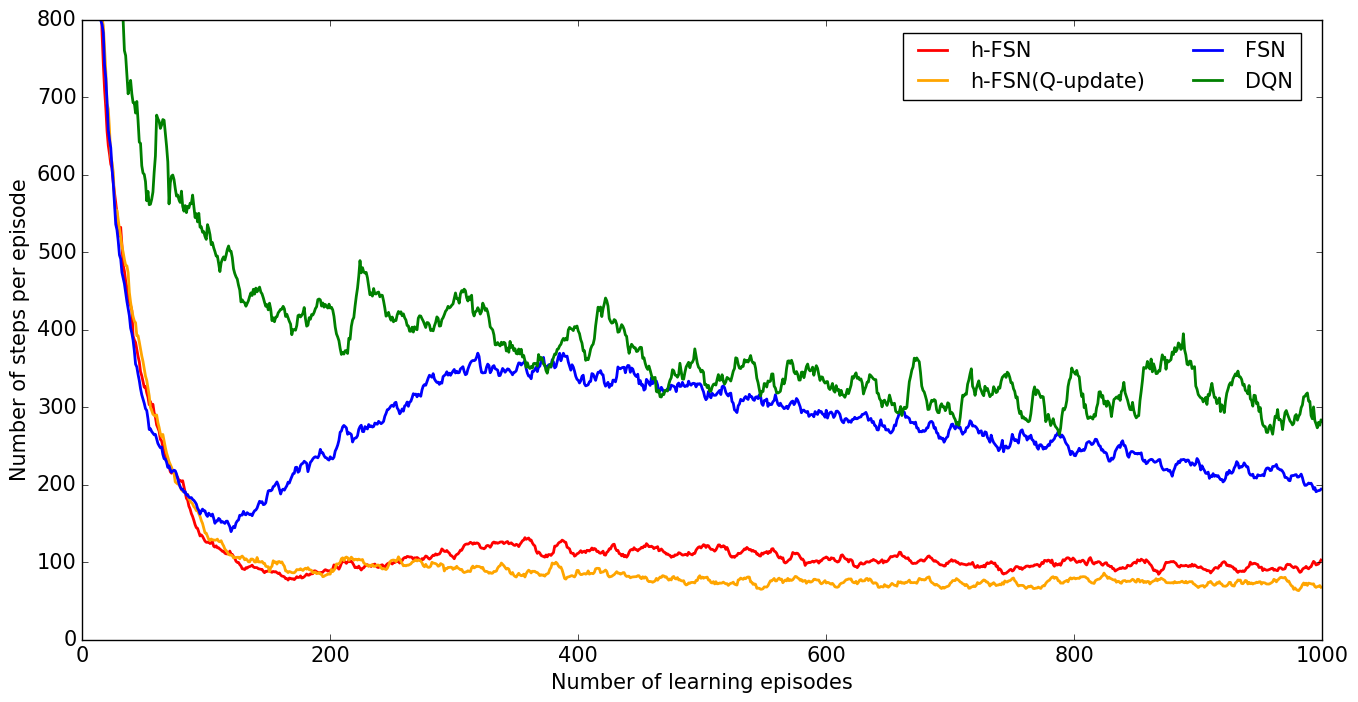

In [60]:
grid_folder = join_path(resluts_dir, 'sparse_grid/4x4x4/periodicenvironment_1/')
pylab.rcParams['figure.figsize'] = 16, 8
pylab.rcParams.update({'font.size':15})
print grid_folder
vizualize_sparse_grid(grid_folder, compute_stats=diff_len_median, 
                      block_algs=['pq'],
                      ylim=(0,800),
                      #yscale='log',
                      xlim=(0,1000),  
                      xlabel="Number of learning episodes",
                      ylabel="Number of steps per episode")
dr.plt.savefig("grid_4x4x4_p_1_median.png", bbox_inches='tight')

../results/sparse_grid/4x4x4/stochasticenvironment/


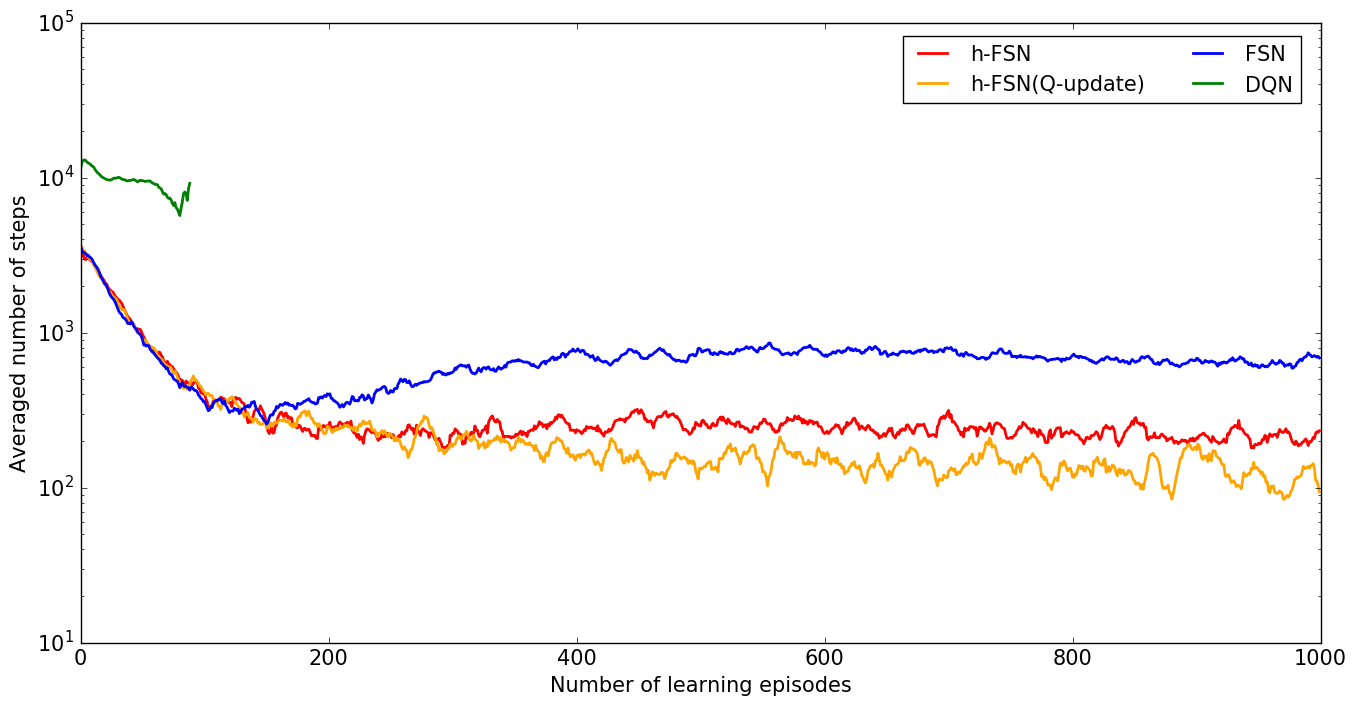

In [61]:
grid_folder = join_path(resluts_dir, 'sparse_grid/4x4x4/stochasticenvironment/')
pylab.rcParams['figure.figsize'] = 16, 8
pylab.rcParams.update({'font.size':15})
print grid_folder
vizualize_sparse_grid(grid_folder, compute_stats=diff_len_mean,
                      block_algs=['pq'],
                      #ylim=(0,800),
                      xlim=(0,1000), 
                      yscale='log',
                      xlabel="Number of learning episodes",
                      ylabel="Averaged number of steps")

#dr.plt.savefig("grid_4x4x4_p_episode_no_DQN_median.png", bbox_inches='tight')

#### Нарисуем графики вида: число завершенных эпизодов к числу шагов:

In [62]:
def to_completed_episodes_per_steps(runs):
    s2e = []
    for run in runs:
        step = 0
        tmp = []
        for ep_id, episode_steps in enumerate(run):
            steps = [ep_id]* episode_steps
            tmp.extend(steps)
        s2e.append(tmp)
    return s2e
  
  
def vizualize_sparse_grid_completed_episodes(grid_folder, compute_stats=None, block_algs=(), **kwargs):
  if compute_stats is None:
    compute_stats = lambda data: average_median(data)

  # загружаем результаты испытаний    
  fsn = load_results(grid_folder + 'fsn_path(0.05,0.99,0.9)_{0}.json', xrange(1,11))
  fsn = to_completed_episodes_per_steps(fsn)
  
  h_fsn = load_results(grid_folder + 'h_fsn_path(0.05,0.99,0.9)_{0}.json', xrange(1,11))
  h_fsn = to_completed_episodes_per_steps(h_fsn)
  
  h_qfsn = load_results(grid_folder + 'h_qfsn_path(0.05,0.9,0.9)_{0}.json', xrange(1,11))
  h_qfsn = to_completed_episodes_per_steps(h_qfsn)
  
  pq = load_results(grid_folder + 'pq_inf(0.1,0.9,0.01)_{0}.json', xrange(1,11))
  pq = to_completed_episodes_per_steps(pq)
  
  dqn = safe_load_results(grid_folder + algname2filename['dqn'], xrange(1,11))
  dqn = to_completed_episodes_per_steps(dqn)
  
  if kwargs.pop('shuffle', False):
    sublist_shuffle(h_fsn, 20, 200)
    sublist_shuffle(h_qfsn, 20, 200)


  last_n = 10 # усреднение по последним n значениям внутри одного графика(для сглаживания)

  #last_n_averages(average_median(paths), n)

  fig = dr.plt.figure(1) 
  ax = fig.add_subplot(111, **kwargs) 
  #if ylim:
  #    ax.set_ylim(*ylim)
  h2l = [] # handels to labels for the legend of the plot

  if 'h_fsn' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(h_fsn),last_n), '-', color = "red", lw=2)
    h2l.append((handle, "h-FSN"))

  if 'h_qfsn' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(h_qfsn), last_n), '-', color = "orange", lw=2)
    h2l.append((handle, "h-FSN(Q-update)"))

  if 'fsn' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(fsn),last_n), '-', color = "blue", lw=2)
    h2l.append((handle, "FSN"))

  if 'pq' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(pq), last_n), '-', color = "purple", lw=2)
    h2l.append((handle, "Periodic Qlearnign"))

  if 'dqn' not in block_algs:
    handle, = ax.plot(last_n_averages(compute_stats(dqn), last_n), '-', color = "green", lw=2)
    h2l.append((handle, "DQN"))


  h, l = zip(*h2l)
  fig.legend(handles=h, labels=l, loc='lower left',# shadow=1, #ncol=6)
             bbox_to_anchor=(.558, .240), # loc='upper right', #bbox_to_anchor=(0.78, 0.98),
             ncol=2, fontsize='medium')

print grid_4x4x1_p1

../results/sparse_grid/4x4x1/periodicenvironment_1/


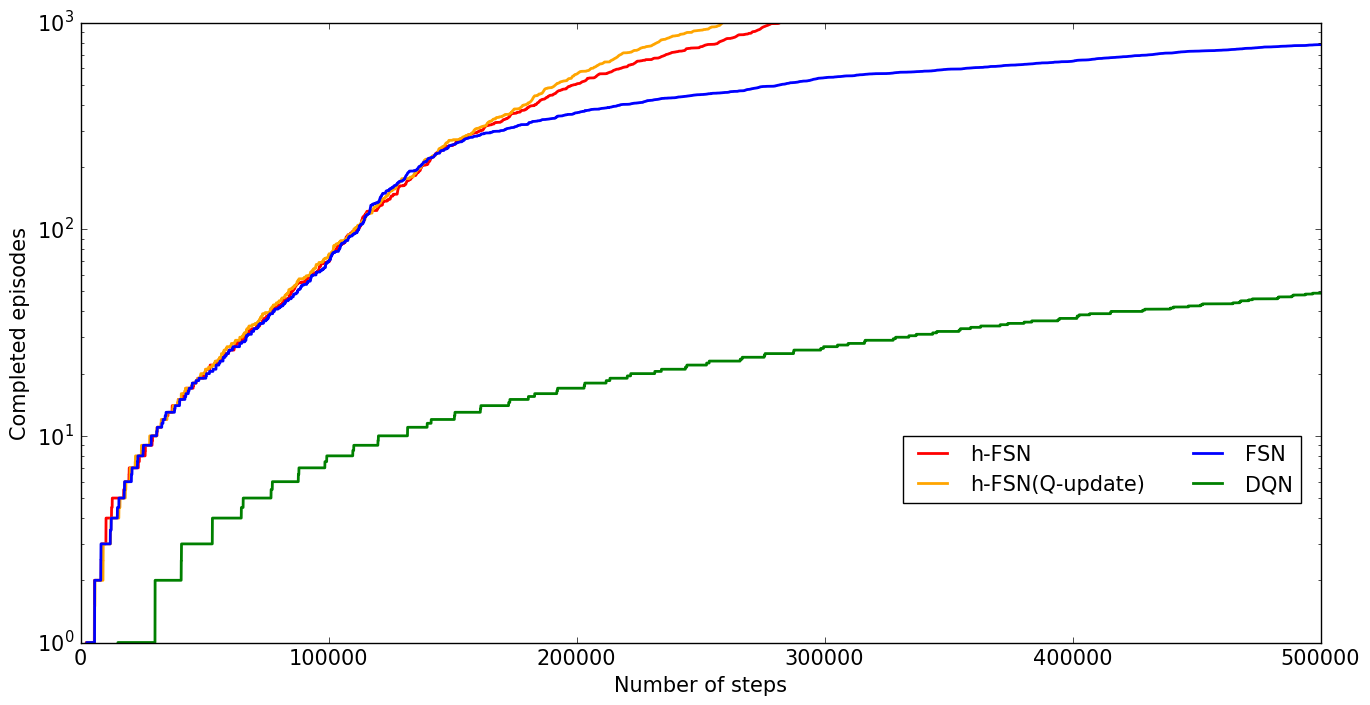

In [63]:
#grid_folder = 'output/sparse_grid/4x4x1/periodicenvironment_1/'


def stats_from_extended_runs(runs, stats_fn):
    maxlen = max(len(run) for run in runs)
    stats = [None]*maxlen
    
    for i in xrange(maxlen):
        stats[i] = stats_fn([r[min(i, len(r)-1)] for r in runs]) 
        
    return stats

extended_mean = lambda x: stats_from_extended_runs(x, np.mean)
extended_median = lambda x: stats_from_extended_runs(x, np.median)

pylab.rcParams['figure.figsize'] = 16, 8
pylab.rcParams.update({'font.size':15})



vizualize_sparse_grid_completed_episodes(
                      grid_4x4x4_ep,
                      compute_stats=extended_median,
                      block_algs=['pq'],
                      ylim=(1,1000),
                      yscale='log',
                      xlim=(0,500000),  
                      xlabel="Number of steps",
                      ylabel="Completed episodes")

#dr.plt.savefig("grid_4x4x1_p_episode_median.png", bbox_inches='tight')

###1.2 Сравнение эффективности обучения FS и лучшего табличного RL алгоритма в средах всех трех размеров:

In [64]:
def vizualize_first10_vs_last10_fs_and_rl(small_envs_results, middle_envs_results, big_envs_results):
    fs_small = load_results(small_envs_results + "/all_paths_{0}.json", xrange(1, 11))
    fs_small_10first = dr.np.average(fs_small[:,:10], axis=1)
    fs_small_10last = dr.np.average(fs_small[:,-10:], axis=1)
    
    fs_middle = load_results(middle_envs_results + "/all_paths_{0}.json", xrange(1, 11))
    fs_middle_10first = dr.np.average(fs_middle[:,:10], axis=1)
    fs_middle_10last = dr.np.average(fs_middle[:,-10:], axis=1)
    
    fs_big = load_results(big_envs_results + "/all_paths_{0}.json", xrange(1, 11))
    fs_big_10first = dr.np.average(fs_big[:,:10], axis=1)
    fs_big_10last = dr.np.average(fs_big[:,-10:], axis=1)
    
    #/лучшие результаты у: q-learning_(0.1,0.9, 0.1) 
    rl_small = load_results(small_envs_results + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_small_10first = dr.np.average(rl_small[:,:10], axis=1)
    rl_small_10last = dr.np.average(rl_small[:,-10:], axis=1)
    
    rl_middle = load_results(middle_envs_results + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_middle_10first = dr.np.average(rl_middle[:,:10], axis=1)
    rl_middle_10last = dr.np.average(rl_middle[:,-10:], axis=1)
    
    rl_big = load_results(big_envs_results + "/q-learning_(0.1,0.9, 0.1)_{0}.json", xrange(1, 11))
    rl_big_10first = dr.np.average(rl_big[:,:10], axis=1)
    rl_big_10last = dr.np.average(rl_big[:,-10:], axis=1)
    
    
    fig, ax = dr.plt.subplots(ncols=1) #figsize=(10, 5))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.2)
    ax.set_ylabel('Average steps for the 10 last episodes')
    ax.set_xlabel('Average steps for the 10 first episodes')
    #ax.set_title('A', loc='left', fontsize=24)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(1,10000)
    ax.set_ylim(1,10000)
    ax.plot(dr.np.linspace(1,10000),dr.np.linspace(1,10000),'--', lw=2)

    for i in range(0, 10):
        # fs middle
        ax.scatter(fs_middle_10first[i*10:(i+1)*10],
                   fs_middle_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.3, marker = 'o', lw= 1, color = 'b')
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
        ax.errorbar(dr.np.average(fs_middle_10first[i*10:(i+1)*10]),
                   dr.np.average(fs_middle_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(fs_middle_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(fs_middle_10last[i*10:(i+1)*10]),
                   alpha = 0.9, elinewidth = 1, color = 'b',
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
                   marker='o', ms=7, capsize = 6, capthick = 1)
        # fs small
        ax.scatter(fs_small_10first[i*10:(i+1)*10],
                   fs_small_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.3, marker = 'o', lw= 1, color = 'b')
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
        ax.errorbar(dr.np.average(fs_small_10first[i*10:(i+1)*10]),
                   dr.np.average(fs_small_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(fs_small_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(fs_small_10last[i*10:(i+1)*10]),
                   alpha = 0.9, elinewidth = 1, color = 'b',
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
                   marker='o', ms=7, capsize = 6, capthick = 1)
        #fs big fs_big_10last
        ax.scatter(fs_big_10first[i*10:(i+1)*10],
                   fs_big_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.3, marker = 'o', lw= 1, color = 'b')
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)))
        ax.errorbar(dr.np.average(fs_big_10first[i*10:(i+1)*10]),
                   dr.np.average(fs_big_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(fs_big_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(fs_big_10last[i*10:(i+1)*10]),
                   alpha = 0.9, elinewidth = 1, color = 'b',
                   #color=dr.plt.cm.gist_rainbow(int(i*25.5)),
                   marker='o', ms=7, capsize = 6, capthick = 1)

        # rl small rl_small_10last
        ax.scatter(rl_small_10first[i*10:(i+1)*10],
                   rl_small_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.2, marker = 'D', lw= 1,
                   color='red')
        ax.errorbar(dr.np.average(rl_small_10first[i*10:(i+1)*10]),
                   dr.np.average(rl_small_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(rl_small_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(rl_small_10last[i*10:(i+1)*10]),
                   alpha = 0.5, elinewidth = 1, #color = 'b',
                   color='red',
                   marker='D', ms=6, capsize = 6, capthick = 1) 
        
        # rl middle rl_middle_10last
        ax.scatter(rl_middle_10first[i*10:(i+1)*10],
                   rl_middle_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.2, marker = 'D', lw= 1,
                   color='red')
        ax.errorbar(dr.np.average(rl_middle_10first[i*10:(i+1)*10]),
                   dr.np.average(rl_middle_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(rl_middle_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(rl_middle_10last[i*10:(i+1)*10]),
                   alpha = 0.5, elinewidth = 1, #color = 'b',
                   color='red',
                   marker='D', ms=6, capsize = 6, capthick = 1)    
        
        # rl big rl_big_10first
        ax.scatter(rl_big_10first[i*10:(i+1)*10],
                   rl_big_10last[i*10:(i+1)*10], s=15, 
                   alpha = 0.2, marker = 'D', lw= 1,
                   color='red')
        ax.errorbar(dr.np.average(rl_big_10first[i*10:(i+1)*10]),
                   dr.np.average(rl_big_10last[i*10:(i+1)*10]),
                   xerr=dr.np.std(rl_big_10first[i*10:(i+1)*10]),
                   yerr=dr.np.std(rl_big_10last[i*10:(i+1)*10]),
                   alpha = 0.5, elinewidth = 1, #color = 'b',
                   color ='red', 
                   marker='D', ms=6, capsize = 6, capthick = 1)  


    #ax2.plot([1,2,3],[dr.np.median(rel_eff_FS_5x5),
    #                 dr.np.median(dr.np.concatenate((rel_eff_FS_10x10,rel_eff_FS2_10x10))),
    #                 dr.np.median(rel_eff_FS_20x20)],'g')
    #ax2.plot([4,5,6],[dr.np.median(rel_eff_RL_5x5),dr.np.median(rel_eff_RL_10x10),dr.np.median(rel_eff_RL_20x20)],'g')

    fs, = ax.plot([0], ms=7,  marker = 'o', lw= 1, color='blue')
    rl, = ax.plot([0], ms=7,  marker = 'D', lw= 1, color='red')
    #rnd, = ax.plot([0], ms=7,  marker = 's', lw= 1, color='black')

    #fig.legend(handles=[fs,rnd,rl], 
    #           labels=['FS','RND','RL'], 
    #           loc='upper center', bbox_to_anchor=(0.23, 0.94), 
    #           ncol=3, fontsize='medium')
    fig.legend(handles=[fs,rl], 
               labels=['FS','RL'], 
               loc='upper center', bbox_to_anchor=(0.1368, 0.87), 
               ncol=2, fontsize='medium')
    
    dr.plt.savefig("First_vs_Last_BA_type1.png", bbox_inches='tight')
    dr.plt.show()

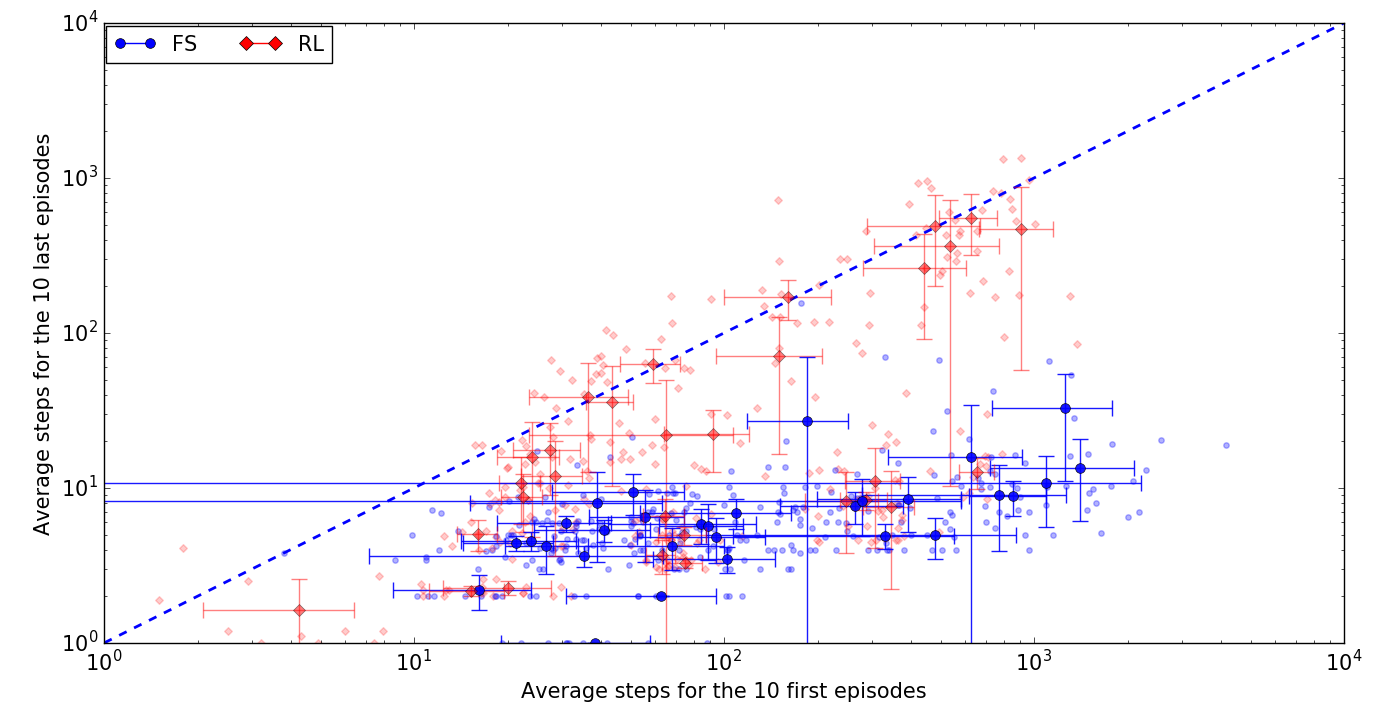

In [65]:
small_envs_results = folder_with_BA_results + "/N25_M3/stochasticenvironment"
middle_envs_results = folder_with_BA_results + "/N100_M3/stochasticenvironment"
big_envs_results = folder_with_BA_results + "/N400_M3/stochasticenvironment"

vizualize_first10_vs_last10_fs_and_rl(small_envs_results,
                                     middle_envs_results,
                                     big_envs_results)

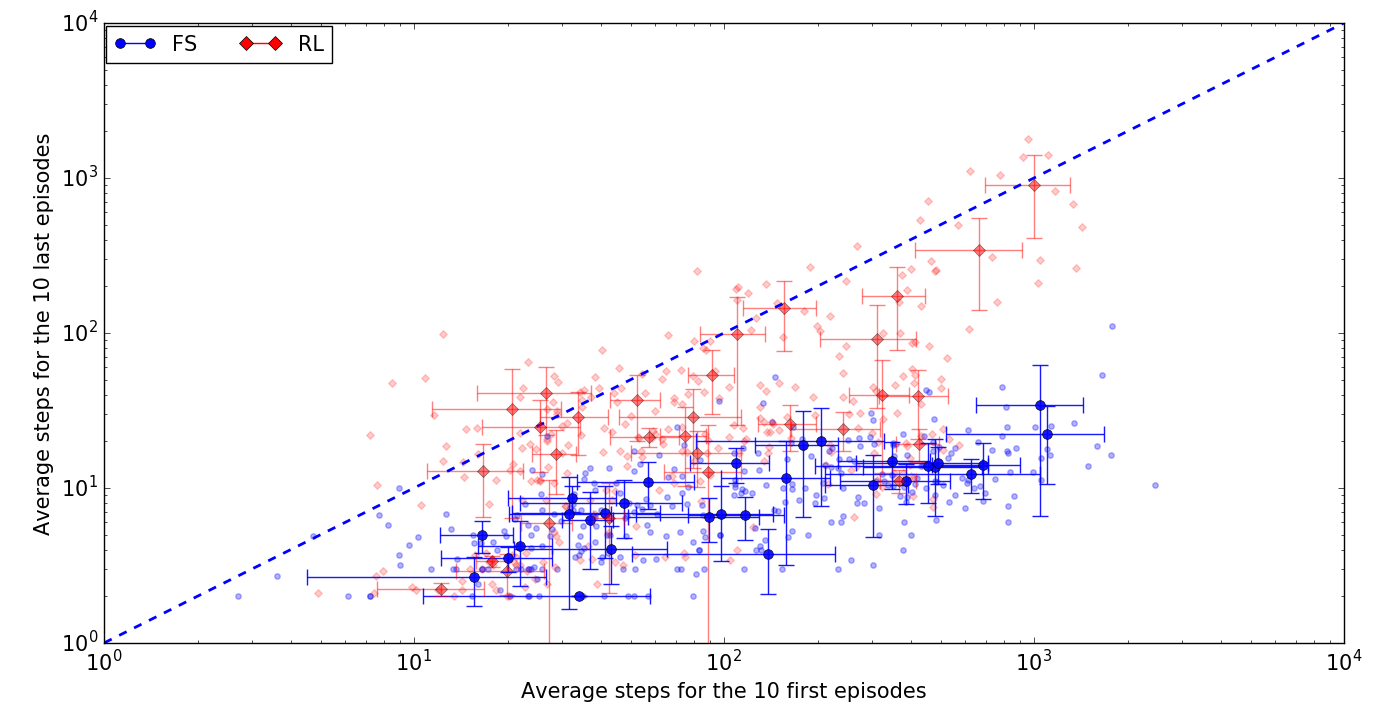

In [66]:
small_envs_results = folder_with_ER_results + "/n25_p0.25/stochasticenvironment"
middle_envs_results = folder_with_ER_results + "/n100_p0.06/stochasticenvironment"
big_envs_results = folder_with_ER_results + "/n400_p0.015/stochasticenvironment"

vizualize_first10_vs_last10_fs_and_rl(small_envs_results,
                                     middle_envs_results,
                                     big_envs_results)

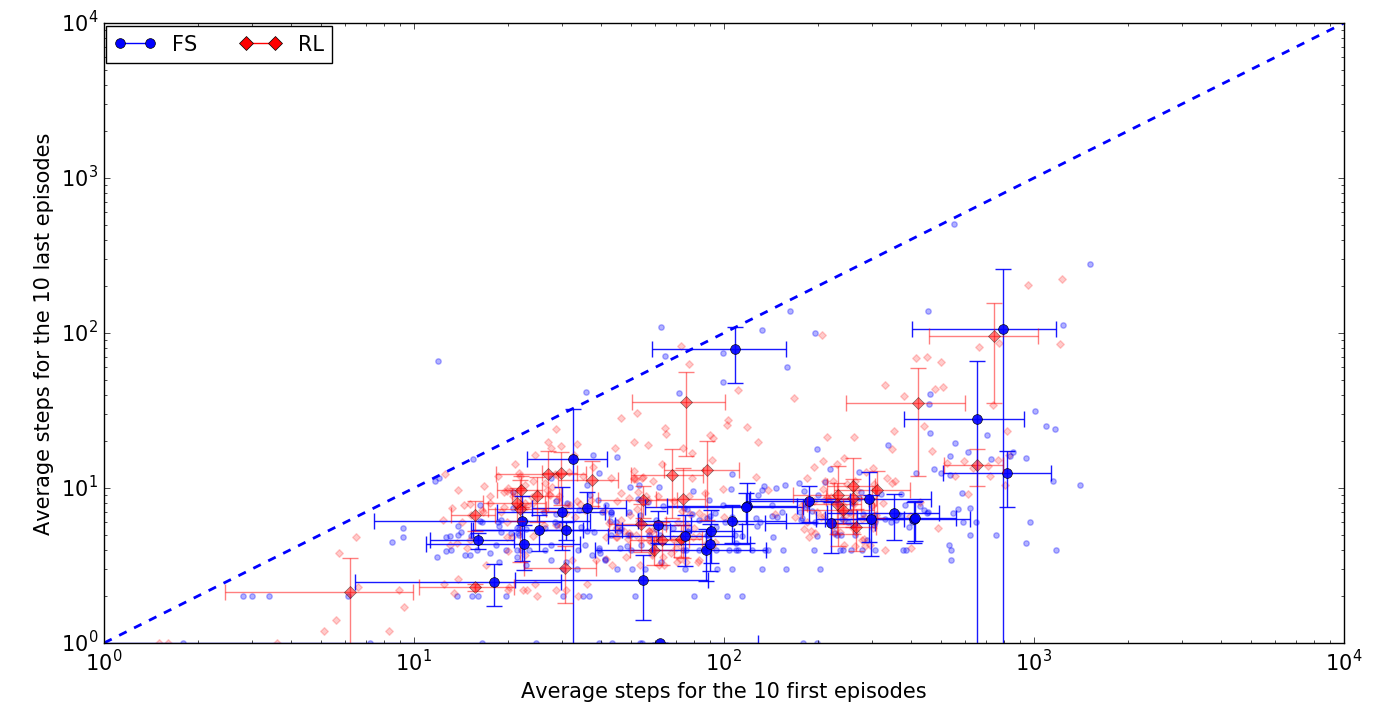

In [67]:
small_envs_results = folder_with_BA_results + "/N25_M3/changestatestochasticityenv"
middle_envs_results = folder_with_BA_results + "/N100_M3/changestatestochasticityenv"
big_envs_results = folder_with_BA_results + "/N400_M3/changestatestochasticityenv"

vizualize_first10_vs_last10_fs_and_rl(small_envs_results,
                                     middle_envs_results,
                                     big_envs_results)

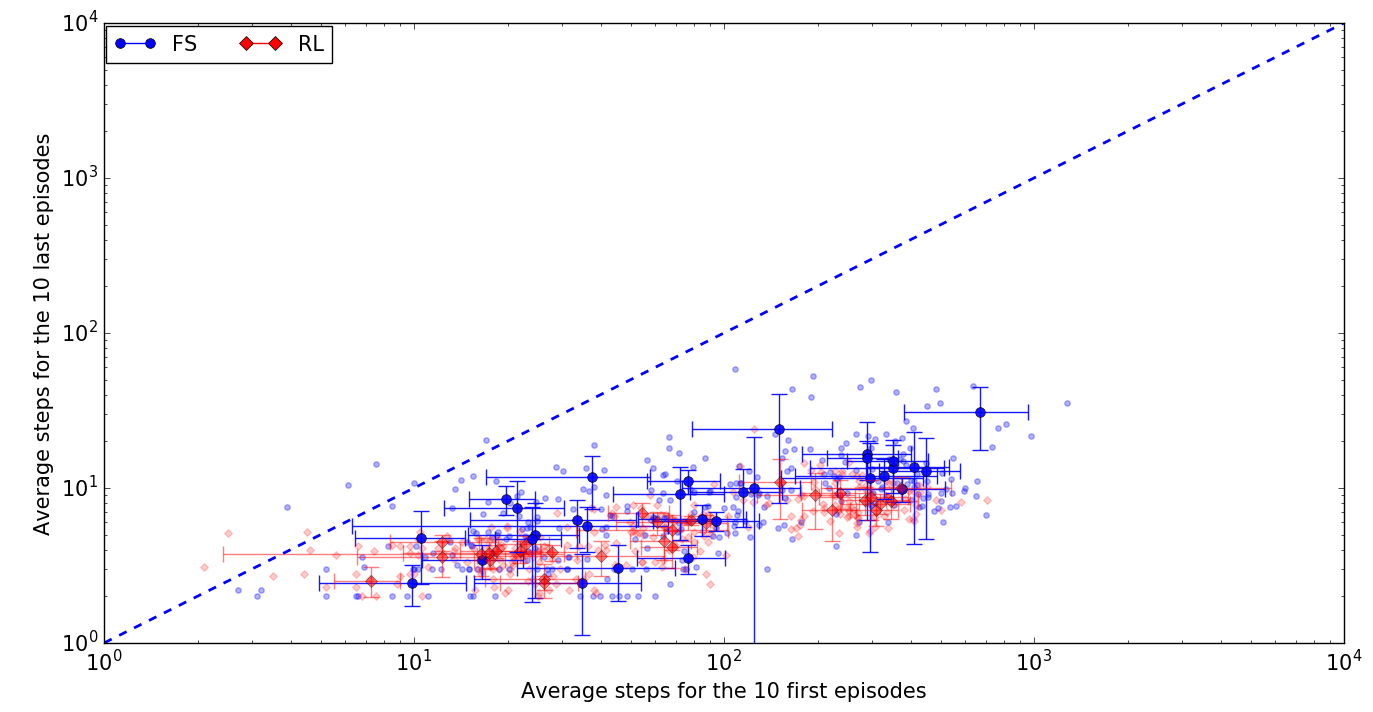

In [68]:
small_envs_results = folder_with_ER_results + "/n25_p0.25/markovenvironment"
middle_envs_results = folder_with_ER_results + "/n100_p0.06/markovenvironment"
big_envs_results = folder_with_ER_results + "/n400_p0.015/markovenvironment"

vizualize_first10_vs_last10_fs_and_rl(small_envs_results,
                                     middle_envs_results,
                                     big_envs_results)

###Зависимость роста числа вторичных функциональных систем при обучении алгоритма.

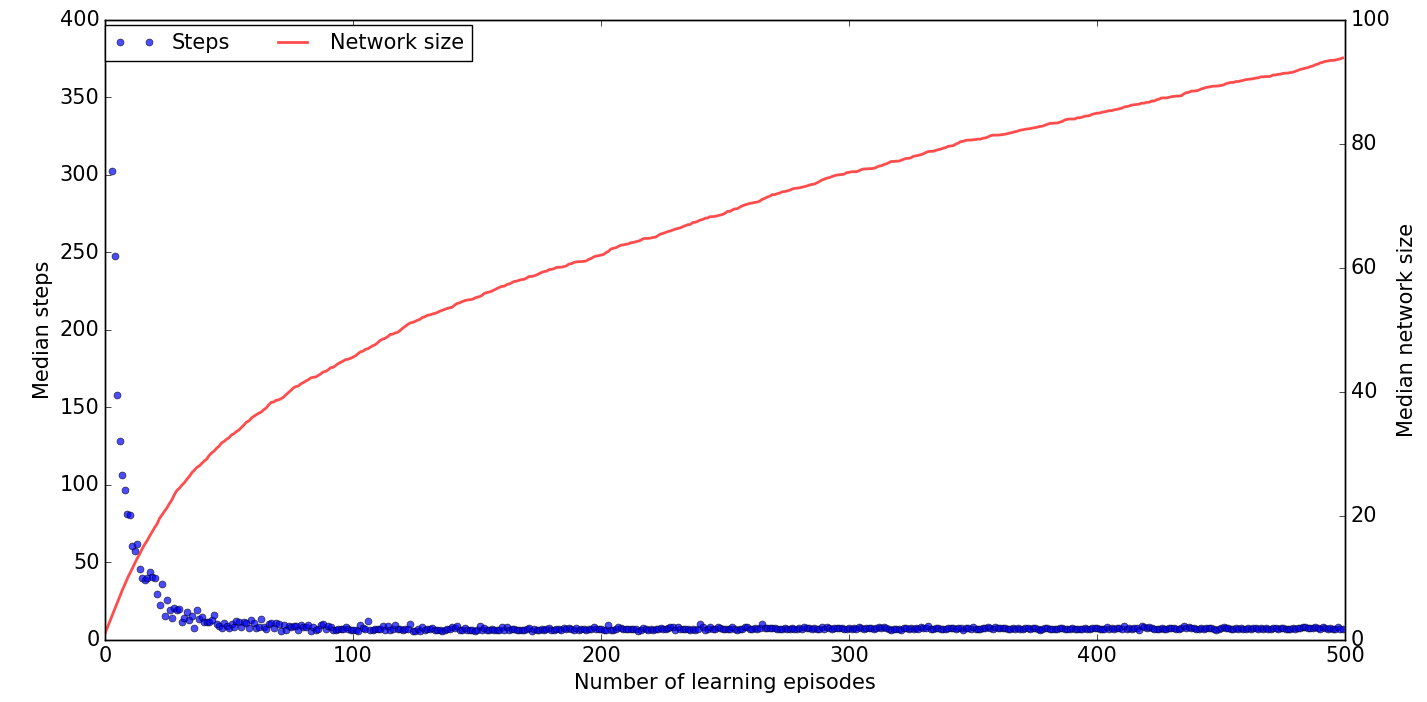

In [69]:
def cumulative_load_results(folders, files_template, file_indices):
    
    results = []
    for folder in folders:
        for i in file_indices:
            results.extend(dr.get_json_data(folder +'/' + files_template.format(i)))
        
    results = dr.np.array(results) #dr.np.clip(dr.np.array(results),0,2000)    
    return results  

def get_results_of_all_stoch_types(folder, files_template):
    folders = [folder + "/" + type_name for type_id, type_name in stoch_types.iteritems()]
    #print folders
    return cumulative_load_results(folders, files_template, xrange(1, 11))


#Сначала данные:
env_config = big_envs[2]
fs_steps = get_results_of_all_stoch_types(env_config, "all_paths_{0}.json")
fs_secs = get_results_of_all_stoch_types(env_config, "all_secondary_{0}.json")
episodes = 500

avrg_paths = dr.np.average(median_by_trial(fs_steps),axis=0)


#fig = dr.plt.figure(1) 
#ax = fig.add_subplot(111, **kwargs) 

fig, ax = dr.plt.subplots(ncols=1) #figsize=(10, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=0.2)

ax.grid(0)
ax.set_ylabel('Median steps')
ax.set_xlabel('Number of learning episodes')
ax.set_ylim(0,400)
#ax.set_title('A', loc='left', fontsize=24)


pt, = ax.plot(avrg_paths[:episodes], 'o', markersize=5, color='blue', alpha=0.7) #обновлено на новые данные
ax2 = ax.twinx()
fs, = ax2.plot(dr.np.average(median_by_trial(fs_secs),  # обновлено на новые данные
                              axis=0)[:episodes],  '-', linewidth=2, color='red', alpha=0.7)
ax2.set_ylabel('Median network size')
ax2.grid(0)
fig.legend(handles=[pt,fs], labels=['Steps','Network size'], ncol=2,
           loc="lower right", bbox_to_anchor=(0.3018, 0.788), 
           fontsize='medium', shadow=0)

#dr.plt.savefig("learning_curve_and_secondary_net_ER_400.png", bbox_inches='tight')
#dr.plt.title("Environment: {0}".format(env_type))
dr.plt.show()    